In [2]:
%matplotlib inline
import pandas as pd # Далее идет импорт библиотек...
import numpy
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') # Стиль отображения графиков
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import losses

Using TensorFlow backend.


In [3]:
import os
os.chdir('C:/Users/Admin/Desktop/КЕЙС/nn') # Путь куда это все будет сохраняться на моем пк

In [4]:
file_with_PRODAJI = 'C:/Users/Admin/Desktop/КЕЙС/data_science_case-data/sales.tsv' # Путь до датасетов на моем пк
file_with_POKUPATELI = 'C:/Users/Admin/Desktop/КЕЙС/data_science_case-data/customers.tsv' # Путь до датасетов на моем пк

In [5]:
df1 = pd.read_csv(file_with_PRODAJI, delimiter='\t', encoding='utf-8')    # Читаем датасет
df1.fillna(0, inplace=True)                                               # Избавляемся от NaN
df2 = pd.read_csv(file_with_POKUPATELI, delimiter='\t', encoding='utf-8')
df2.fillna(0, inplace=True)

In [6]:
df1['year'] = df1.year.map(str) + '-' + df1.month.map(str) # Соединяем стобцы 'year' и 'month' в один
df1.drop('month', axis=1, inplace=True)                    # Сбрасываем из датасета не нужный столбец 'month'
df1.tail()

year    location ira product_category           brand   sku_id  \
1724  2019-6  Pirate Bay  PB        Lollipops     Chupa Chups  sku #97   
1725  2019-6     Village  VL       Chocolates  Ferrero Rocher  sku #30   
1726  2019-6     Village  VL       Chocolates  Ferrero Rocher  sku #46   
1727  2019-6     Village  VL       Chocolates       Toblerone  sku #25   
1728  2019-6     Village  VL       Chocolates       Toblerone  sku #73   

      item_per_bundle     shape with_alcohol  filling  volume     price  
1724                1     Round           No     Nuts  5790.0  1.316449  
1725                1  Standart           No  Nothing   394.0  1.251254  
1726                1  Standart           No  Nothing   197.0  1.251254  
1727                1  Standart           No  Nothing    49.0  1.251254  
1728                1  Standart           No  Nothing    49.0  1.251254

In [7]:
df_for_MN = df1.loc[(df1['location'] == 'Moon')] # Обозначаем локацию в которой будем работать
df_for_MN.drop('location', axis=1, inplace=True)       # Сбрасываем все ненужные столбцы данных, ОСОБЕННО str
df_for_MN.drop('ira', axis=1, inplace=True)
df_for_MN.drop('product_category', axis=1, inplace=True)
df_for_MN.drop('brand', axis=1, inplace=True)
df_for_MN.drop('item_per_bundle', axis=1, inplace=True)
df_for_MN.drop('shape', axis=1, inplace=True)
df_for_MN.drop('with_alcohol', axis=1, inplace=True)
df_for_MN.drop('filling', axis=1, inplace=True)
df_for_MN.drop('price', axis=1, inplace=True)         

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
# -SKU#3-

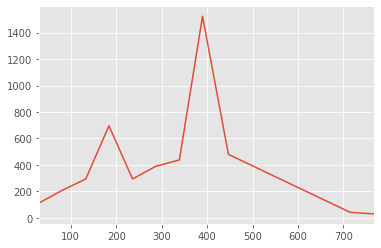

In [9]:
MN_sku3 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #3')] # Настраиваем датасет на первый из доступных sku
MN_sku3.drop('sku_id', axis=1, inplace=True)                # Затем сбрасываем столбец с ним
MN_sku3.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖИ В 2019

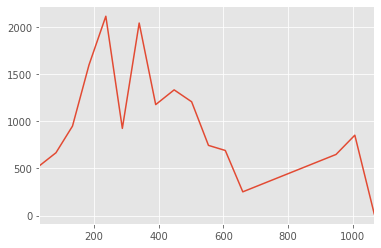

In [10]:
MN_sku5 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #5')]
MN_sku5.drop('sku_id', axis=1, inplace=True)
MN_sku5.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖИ В 2019

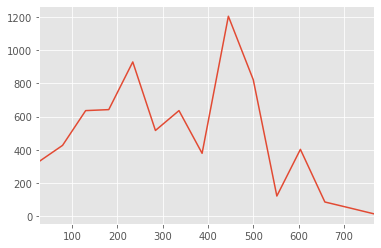

In [11]:
MN_sku7 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #7')]
MN_sku7.drop('sku_id', axis=1, inplace=True)
MN_sku7.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖИ В 2019

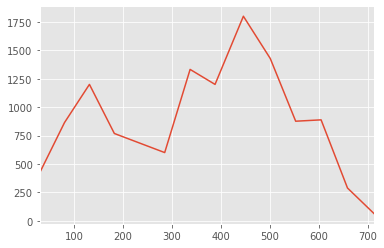

In [12]:
MN_sku11 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #11')]
MN_sku11.drop('sku_id', axis=1, inplace=True)
MN_sku11.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖИ В 2019

In [115]:
MN_sku16 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #16')]
MN_sku16.drop('sku_id', axis=1, inplace=True)
#MN_sku16.iloc[:,1].plot()

NN_MN_sku16 = pd.DataFrame()                                 # Создаем новый дата сет для нейронки

for i in range(6,0,-1):                                      # Преобразуем данные для предсказаний нейронной сети
    NN_MN_sku16['t-' + str(i)] = MN_sku16.iloc[:,1].shift(i) # Сдвигаем наши наблюдения
    
NN_MN_sku16['t'] = MN_sku16.iloc[:,1].values                 # Записываем исходный ряд в последний столбец
#print(NN_MN_sku16.head(7))                                  # Проверяем

new_NN_MN_sku16 = NN_MN_sku16[6:]                            # Отрезаем первые 12 строк, чтобы избавиться от NaN
#new_NN_MN_sku16.head()                                      # Проверяем что сделали

y = new_NN_MN_sku16['t']                                     # Разделям у и х. у - отклик
x = new_NN_MN_sku16.drop('t', axis=1)                        # х - предикторы, после отбрасывания последнего столбца

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train = x[:4]                                              # Разделяем на обучающую и тестовую выборки
y_train = y[:4]                                              # Для тестовой отрезаем последние наблюдения, в нашем случае
x_test = x[4:]                                               # это 3 месяца, на них и будет основываться наш прогноз
y_test = y[4:]

#print(new_NN_MN_sku16.shape)                                # Определяем размерности
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
#print(x_train.head(5))                                      # Проверяем

x_train = x_train.values                                     # Преобразуем в матрицы numpy чтобы их смог прочесть keras
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

# NN

model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))         # Ставим 6 нейронов, по 6 димов, т.к у нас 6 месяцев, активируем relu
model.add(Dense(1, activation='linear'))                    # Поскольку у нас задача регрессии, то берем линейную функцию, выходной нейрон 1
model.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) # потери mse, оптимайзер adam, метрика по mape
model.fit(x_train, y_train, epochs=300, batch_size=None)    # Модель тренеровки, 300 эпох, снимаю батчи, т.к данных не много

Epoch 1/300
4/4 [==============================] - 2s 559ms/step - loss: 218344.9844 - mean_absolute_percentage_error: 17.5144
Epoch 2/300
4/4 [==============================] - 0s 499us/step - loss: 212370.4375 - mean_absolute_percentage_error: 16.7241
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 206997.4219 - mean_absolute_percentage_error: 16.1855
Epoch 4/300
4/4 [==============================] - 0s 997us/step - loss: 201549.8281 - mean_absolute_percentage_error: 15.7837
Epoch 5/300
4/4 [==============================] - 0s 998us/step - loss: 196289.2188 - mean_absolute_percentage_error: 15.4466
Epoch 6/300
4/4 [==============================] - 0s 505us/step - loss: 191355.0781 - mean_absolute_percentage_error: 15.2654
Epoch 7/300
4/4 [==============================] - 0s 504us/step - loss: 186697.1719 - mean_absolute_percentage_error: 15.2756
Epoch 8/300
4/4 [==============================] - 0s 998us/step - loss: 182187.4219 - mean_absolute_percentage_e

Epoch 66/300
4/4 [==============================] - 0s 1ms/step - loss: 127434.2266 - mean_absolute_percentage_error: 12.5072
Epoch 67/300
4/4 [==============================] - 0s 498us/step - loss: 126676.1875 - mean_absolute_percentage_error: 12.4513
Epoch 68/300
4/4 [==============================] - 0s 748us/step - loss: 125921.5781 - mean_absolute_percentage_error: 12.3974
Epoch 69/300
4/4 [==============================] - 0s 492us/step - loss: 125169.7812 - mean_absolute_percentage_error: 12.3507
Epoch 70/300
4/4 [==============================] - 0s 997us/step - loss: 124419.9766 - mean_absolute_percentage_error: 12.3136
Epoch 71/300
4/4 [==============================] - 0s 748us/step - loss: 123672.2188 - mean_absolute_percentage_error: 12.2861
Epoch 72/300
4/4 [==============================] - 0s 749us/step - loss: 122926.7422 - mean_absolute_percentage_error: 12.2652
Epoch 73/300
4/4 [==============================] - 0s 991us/step - loss: 122184.5547 - mean_absolute_perc

Epoch 131/300
4/4 [==============================] - 0s 1ms/step - loss: 84702.2422 - mean_absolute_percentage_error: 10.3239
Epoch 132/300
4/4 [==============================] - 0s 751us/step - loss: 84135.4531 - mean_absolute_percentage_error: 10.2807
Epoch 133/300
4/4 [==============================] - 0s 495us/step - loss: 83570.9609 - mean_absolute_percentage_error: 10.2291
Epoch 134/300
4/4 [==============================] - 0s 497us/step - loss: 83009.3359 - mean_absolute_percentage_error: 10.1763
Epoch 135/300
4/4 [==============================] - 0s 745us/step - loss: 82450.2812 - mean_absolute_percentage_error: 10.1290
Epoch 136/300
4/4 [==============================] - 0s 1ms/step - loss: 81892.7031 - mean_absolute_percentage_error: 10.0916
Epoch 137/300
4/4 [==============================] - 0s 1ms/step - loss: 81336.5156 - mean_absolute_percentage_error: 10.0643
Epoch 138/300
4/4 [==============================] - 0s 505us/step - loss: 80782.2578 - mean_absolute_percenta

Epoch 196/300
4/4 [==============================] - 0s 2ms/step - loss: 53177.2109 - mean_absolute_percentage_error: 8.4114
Epoch 197/300
4/4 [==============================] - 0s 991us/step - loss: 52783.0195 - mean_absolute_percentage_error: 8.4511
Epoch 198/300
4/4 [==============================] - 0s 748us/step - loss: 52303.5078 - mean_absolute_percentage_error: 8.3784
Epoch 199/300
4/4 [==============================] - 0s 495us/step - loss: 51784.9062 - mean_absolute_percentage_error: 8.2207
Epoch 200/300
4/4 [==============================] - 0s 748us/step - loss: 51301.2070 - mean_absolute_percentage_error: 8.0342
Epoch 201/300
4/4 [==============================] - 0s 5ms/step - loss: 50862.8906 - mean_absolute_percentage_error: 7.8803
Epoch 202/300
4/4 [==============================] - 0s 499us/step - loss: 50426.4805 - mean_absolute_percentage_error: 7.8011
Epoch 203/300
4/4 [==============================] - 0s 506us/step - loss: 50297.1875 - mean_absolute_percentage_er

Epoch 261/300
4/4 [==============================] - 0s 990us/step - loss: 31418.9336 - mean_absolute_percentage_error: 6.3152
Epoch 262/300
4/4 [==============================] - 0s 744us/step - loss: 31251.2031 - mean_absolute_percentage_error: 6.3052
Epoch 263/300
4/4 [==============================] - 0s 997us/step - loss: 30952.7422 - mean_absolute_percentage_error: 6.1385
Epoch 264/300
4/4 [==============================] - 0s 5ms/step - loss: 30762.9336 - mean_absolute_percentage_error: 6.0482
Epoch 265/300
4/4 [==============================] - 0s 505us/step - loss: 30520.8828 - mean_absolute_percentage_error: 6.0492
Epoch 266/300
4/4 [==============================] - 0s 748us/step - loss: 30242.9258 - mean_absolute_percentage_error: 6.1228
Epoch 267/300
4/4 [==============================] - 0s 748us/step - loss: 29975.5000 - mean_absolute_percentage_error: 6.2213
Epoch 268/300
4/4 [==============================] - 0s 1ms/step - loss: 29723.9648 - mean_absolute_percentage_er

In [116]:
scores = model.evaluate(x_test, y_test) # Проверяем качество на тестовом множестве
y_pred = model.predict(x_test)          # Задаем y_pred

def smape(y_test, y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) # Формула SMAPE

print(smape(y_test, y_pred))
# Подсчитали SMAPE 

3/3 [==============================] - 1s 309ms/step
288.23735279352667


(4, 6)
(4,)
(3, 6)
(3,)
(13, 7)


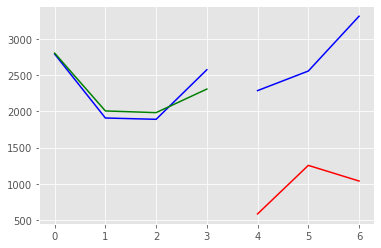

In [117]:
predictions = model.predict(x_test)                # Вычисляем прогноз
predictions_train = model.predict(x_train)         # Подгонка

print(x_train.shape)                               # Еще раз все проверяем
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(NN_MN_sku16.shape)

x2 = numpy.arange(0, 4, 1)                        # задаем наши числа 
x3 = numpy.arange(4, 7, 1)

plt.plot(x2, y_train, color='blue')                # обучающая
plt.plot(x2, predictions_train, color='green')     # подгонка
plt.plot(x3, y_test, color='blue')                 # тестовая
plt.plot(x3, predictions, color='red')             # прогноз

# redline - прогноз, greenline - подгонка

# ДАЛЬШЕ ПО КОДУ, ВСE ПОВТОРЯЕТСЯ

In [118]:
print(predictions)

[[ 584.71265]
 [1254.4264 ]
 [1038.6433 ]]


In [50]:
# -SKU#17-

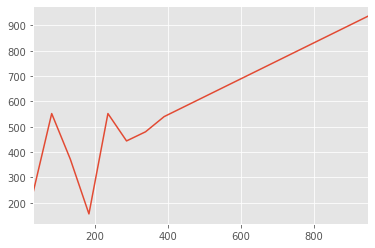

In [51]:
MN_sku17 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #17')]
MN_sku17.drop('sku_id', axis=1, inplace=True)
MN_sku17.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖИ В 2019

In [52]:
MN_sku22 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #22')]
MN_sku22.drop('sku_id', axis=1, inplace=True)
#MN_sku22.iloc[:,1].plot() 

NN_MN_sku22 = pd.DataFrame()                                

for i in range(6,0,-1):                                    
    NN_MN_sku22['t-' + str(i)] = MN_sku22.iloc[:,1].shift(i)
    
NN_MN_sku22['t'] = MN_sku22.iloc[:,1].values                
#print(NN_MN_sku22.head(7))                                 

new_NN_MN_sku22 = NN_MN_sku22[6:]                           
#new_NN_MN_sku22.head()                                     

y1 = new_NN_MN_sku22['t']                                    
x1 = new_NN_MN_sku22.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train1 = x1[:4]                                            
y_train1 = y1[:4]                                            
x_test1 = x1[4:]                                              
y_test1 = y1[4:]

#print(new_NN_MN_sku22.shape)                               
#print(x_train1.shape)
#print(y_train1.shape)
#print(x_test1.shape)
#print(y_test1.shape)
#print(x_train1.head(5))                                     

x_train1 = x_train1.values                                    
y_train1 = y_train1.values
x_test1 = x_test1.values
y_test1 = y_test1.values

# NN

model1 = Sequential()
model1.add(Dense(6, input_dim=6, activation='relu'))       
model1.add(Dense(1, activation='linear'))                   
model1.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model1.fit(x_train1, y_train1, epochs=300, batch_size=None)   

Epoch 1/300
4/4 [==============================] - 1s 248ms/step - loss: 1387392.0000 - mean_absolute_percentage_error: 27.9422
Epoch 2/300
4/4 [==============================] - 0s 257us/step - loss: 1325153.5000 - mean_absolute_percentage_error: 25.8859
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 1278233.1250 - mean_absolute_percentage_error: 24.3759
Epoch 4/300
4/4 [==============================] - 0s 997us/step - loss: 1231980.0000 - mean_absolute_percentage_error: 23.3921
Epoch 5/300
4/4 [==============================] - 0s 498us/step - loss: 1184754.8750 - mean_absolute_percentage_error: 22.6793
Epoch 6/300
4/4 [==============================] - 0s 499us/step - loss: 1137054.1250 - mean_absolute_percentage_error: 22.1338
Epoch 7/300
4/4 [==============================] - 0s 750us/step - loss: 1089468.7500 - mean_absolute_percentage_error: 21.7008
Epoch 8/300
4/4 [==============================] - 0s 499us/step - loss: 1042525.6250 - mean_absolute_perc

Epoch 66/300
4/4 [==============================] - 0s 498us/step - loss: 142991.7344 - mean_absolute_percentage_error: 8.9420
Epoch 67/300
4/4 [==============================] - 0s 499us/step - loss: 138361.8438 - mean_absolute_percentage_error: 8.8103
Epoch 68/300
4/4 [==============================] - 0s 499us/step - loss: 133871.8906 - mean_absolute_percentage_error: 8.6786
Epoch 69/300
4/4 [==============================] - 0s 499us/step - loss: 129518.3828 - mean_absolute_percentage_error: 8.5469
Epoch 70/300
4/4 [==============================] - 0s 2ms/step - loss: 125297.1016 - mean_absolute_percentage_error: 8.4155
Epoch 71/300
4/4 [==============================] - 0s 8ms/step - loss: 121203.1484 - mean_absolute_percentage_error: 8.2846
Epoch 72/300
4/4 [==============================] - 0s 499us/step - loss: 117232.4688 - mean_absolute_percentage_error: 8.1546
Epoch 73/300
4/4 [==============================] - 0s 500us/step - loss: 113379.8125 - mean_absolute_percentage_er

Epoch 131/300
4/4 [==============================] - 0s 749us/step - loss: 11054.4785 - mean_absolute_percentage_error: 2.3818
Epoch 132/300
4/4 [==============================] - 0s 499us/step - loss: 10533.5225 - mean_absolute_percentage_error: 2.3203
Epoch 133/300
4/4 [==============================] - 0s 997us/step - loss: 10034.1309 - mean_absolute_percentage_error: 2.2600
Epoch 134/300
4/4 [==============================] - 0s 499us/step - loss: 9554.2119 - mean_absolute_percentage_error: 2.2007
Epoch 135/300
4/4 [==============================] - 0s 499us/step - loss: 9096.0703 - mean_absolute_percentage_error: 2.1427
Epoch 136/300
4/4 [==============================] - 0s 497us/step - loss: 8657.3506 - mean_absolute_percentage_error: 2.0858
Epoch 137/300
4/4 [==============================] - 0s 250us/step - loss: 8237.6377 - mean_absolute_percentage_error: 2.0301
Epoch 138/300
4/4 [==============================] - 0s 499us/step - loss: 7835.9014 - mean_absolute_percentage_err

Epoch 197/300
4/4 [==============================] - 0s 249us/step - loss: 254.5816 - mean_absolute_percentage_error: 0.3373
Epoch 198/300
4/4 [==============================] - 0s 750us/step - loss: 238.5692 - mean_absolute_percentage_error: 0.3282
Epoch 199/300
4/4 [==============================] - 0s 250us/step - loss: 223.5170 - mean_absolute_percentage_error: 0.3193
Epoch 200/300
4/4 [==============================] - 0s 494us/step - loss: 209.3980 - mean_absolute_percentage_error: 0.3106
Epoch 201/300
4/4 [==============================] - 0s 748us/step - loss: 196.1315 - mean_absolute_percentage_error: 0.3022
Epoch 202/300
4/4 [==============================] - 0s 750us/step - loss: 183.6638 - mean_absolute_percentage_error: 0.2939
Epoch 203/300
4/4 [==============================] - 0s 499us/step - loss: 171.9689 - mean_absolute_percentage_error: 0.2859
Epoch 204/300
4/4 [==============================] - 0s 499us/step - loss: 161.0000 - mean_absolute_percentage_error: 0.2780


Epoch 264/300
4/4 [==============================] - 0s 499us/step - loss: 2.8586 - mean_absolute_percentage_error: 0.0450
Epoch 265/300
4/4 [==============================] - 0s 748us/step - loss: 2.6748 - mean_absolute_percentage_error: 0.0436
Epoch 266/300
4/4 [==============================] - 0s 499us/step - loss: 2.5030 - mean_absolute_percentage_error: 0.0422
Epoch 267/300
4/4 [==============================] - 0s 499us/step - loss: 2.3433 - mean_absolute_percentage_error: 0.0408
Epoch 268/300
4/4 [==============================] - 0s 756us/step - loss: 2.1930 - mean_absolute_percentage_error: 0.0395
Epoch 269/300
4/4 [==============================] - 0s 499us/step - loss: 2.0528 - mean_absolute_percentage_error: 0.0382
Epoch 270/300
4/4 [==============================] - 0s 499us/step - loss: 1.9214 - mean_absolute_percentage_error: 0.0370
Epoch 271/300
4/4 [==============================] - 0s 250us/step - loss: 1.7975 - mean_absolute_percentage_error: 0.0358
Epoch 272/300
4/

In [53]:
scores1 = model1.evaluate(x_test1, y_test1)
y_pred1 = model1.predict(x_test1)          

def smape(y_test1, y_pred1):
    return 100/len(y_test1) * np.sum(2 * np.abs(y_pred1 - y_test1) / (np.abs(y_test1) + np.abs(y_pred1)))

print(smape(y_test1, y_pred1))

3/3 [==============================] - 0s 110ms/step
291.6843454383221


(4, 6)
(4,)
(3, 6)
(3,)
(13, 7)


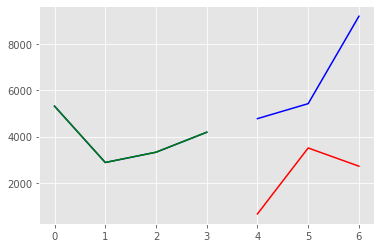

In [54]:
predictions1 = model1.predict(x_test1)                
predictions_train1 = model1.predict(x_train1)         

print(x_train1.shape)                               
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)
print(NN_MN_sku22.shape)

x2_1 = numpy.arange(0, 4, 1)                         
x3_1 = numpy.arange(4, 7, 1)

plt.plot(x2_1, y_train1, color='blue')                
plt.plot(x2_1, predictions_train1, color='green')     
plt.plot(x3_1, y_test1, color='blue')                 
plt.plot(x3_1, predictions1, color='red')             

# redline - прогноз, greenline - подгонка

In [55]:
print(predictions1)

[[ 656.2148]
 [3507.822 ]
 [2719.9646]]


In [63]:
# -SKU#25-

(8, 2)


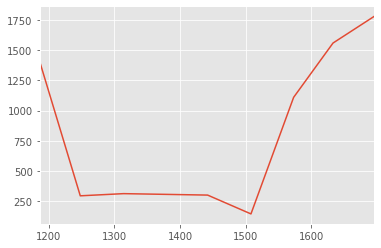

In [8]:
MN_sku25 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #25')]
MN_sku25.drop('sku_id', axis=1, inplace=True)
MN_sku25.iloc[:,1].plot() 


print(MN_sku25.shape)

# Из-за малого количества данных, я не могу составить адекватный прогноз. Я сам то в него не поверю....

In [79]:
# -SKU#27-

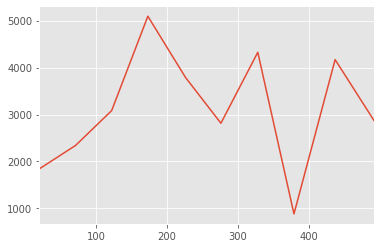

In [80]:
MN_sku27 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #27')]
MN_sku27.drop('sku_id', axis=1, inplace=True)
MN_sku27.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖ в 2019

In [81]:
# -SKU#28-

In [131]:
MN_sku28 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #28')]
MN_sku28.drop('sku_id', axis=1, inplace=True)
#MN_sku28.iloc[:,1].plot() 

NN_MN_sku28 = pd.DataFrame()                                

for i in range(6,0,-1):                                    
    NN_MN_sku28['t-' + str(i)] = MN_sku28.iloc[:,1].shift(i)
    
NN_MN_sku28['t'] = MN_sku28.iloc[:,1].values                
#print(NN_MN_sku28.head(7))                                 

new_NN_MN_sku28 = NN_MN_sku28[6:]                           
#new_NN_MN_sku28.head()                                     

y3 = new_NN_MN_sku28['t']                                    
x3 = new_NN_MN_sku28.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train3 = x3[:4]                                            
y_train3 = y3[:4]                                            
x_test3 = x3[4:]                                              
y_test3 = y3[4:]

#print(new_NN_MN_sku28.shape)                               
#print(x_train3.shape)
#print(y_train3.shape)
#print(x_test3.shape)
#print(y_test3.shape)
#print(x_train3.head(5))                                     

x_train3 = x_train3.values                                    
y_train3 = y_train3.values
x_test3 = x_test3.values
y_test3 = y_test3.values

# NN

model3 = Sequential()
model3.add(Dense(6, input_dim=6, activation='relu'))       
model3.add(Dense(1, activation='linear'))                   
model3.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model3.fit(x_train3, y_train3, epochs=300, batch_size=None)

Epoch 1/300
4/4 [==============================] - 2s 624ms/step - loss: 434262.7812 - mean_absolute_percentage_error: 18.7166
Epoch 2/300
4/4 [==============================] - 0s 748us/step - loss: 357652.3125 - mean_absolute_percentage_error: 16.4906
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 292553.6875 - mean_absolute_percentage_error: 14.2808
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 239017.8594 - mean_absolute_percentage_error: 12.6142
Epoch 5/300
4/4 [==============================] - 0s 999us/step - loss: 196901.7344 - mean_absolute_percentage_error: 11.7176
Epoch 6/300
4/4 [==============================] - 0s 747us/step - loss: 165802.9688 - mean_absolute_percentage_error: 11.4410
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 144992.5156 - mean_absolute_percentage_error: 11.1758
Epoch 8/300
4/4 [==============================] - 0s 997us/step - loss: 133356.6250 - mean_absolute_percentage_error

Epoch 66/300
4/4 [==============================] - 0s 1ms/step - loss: 104132.1328 - mean_absolute_percentage_error: 9.5880
Epoch 67/300
4/4 [==============================] - 0s 748us/step - loss: 103551.8516 - mean_absolute_percentage_error: 9.5515
Epoch 68/300
4/4 [==============================] - 0s 748us/step - loss: 102985.1406 - mean_absolute_percentage_error: 9.5141
Epoch 69/300
4/4 [==============================] - 0s 499us/step - loss: 102437.5781 - mean_absolute_percentage_error: 9.4764
Epoch 70/300
4/4 [==============================] - 0s 492us/step - loss: 101909.6719 - mean_absolute_percentage_error: 9.4392
Epoch 71/300
4/4 [==============================] - 0s 742us/step - loss: 101398.1250 - mean_absolute_percentage_error: 9.4031
Epoch 72/300
4/4 [==============================] - 0s 742us/step - loss: 100896.7578 - mean_absolute_percentage_error: 9.3686
Epoch 73/300
4/4 [==============================] - 0s 748us/step - loss: 100398.4922 - mean_absolute_percentage_

Epoch 131/300
4/4 [==============================] - 0s 1ms/step - loss: 71667.3359 - mean_absolute_percentage_error: 7.8200
Epoch 132/300
4/4 [==============================] - 0s 1ms/step - loss: 71216.4141 - mean_absolute_percentage_error: 7.7934
Epoch 133/300
4/4 [==============================] - 0s 748us/step - loss: 70767.4531 - mean_absolute_percentage_error: 7.7667
Epoch 134/300
4/4 [==============================] - 0s 1ms/step - loss: 70320.1250 - mean_absolute_percentage_error: 7.7398
Epoch 135/300
4/4 [==============================] - 0s 755us/step - loss: 69874.8594 - mean_absolute_percentage_error: 7.7128
Epoch 136/300
4/4 [==============================] - 0s 995us/step - loss: 69431.3438 - mean_absolute_percentage_error: 7.6857
Epoch 137/300
4/4 [==============================] - 0s 1ms/step - loss: 68989.6719 - mean_absolute_percentage_error: 7.6584
Epoch 138/300
4/4 [==============================] - 0s 742us/step - loss: 68550.0938 - mean_absolute_percentage_error:

Epoch 196/300
4/4 [==============================] - 0s 748us/step - loss: 46541.7695 - mean_absolute_percentage_error: 6.1037
Epoch 197/300
4/4 [==============================] - 0s 501us/step - loss: 46223.5547 - mean_absolute_percentage_error: 6.0785
Epoch 198/300
4/4 [==============================] - 0s 1ms/step - loss: 45907.1758 - mean_absolute_percentage_error: 6.0533
Epoch 199/300
4/4 [==============================] - 0s 754us/step - loss: 45592.9609 - mean_absolute_percentage_error: 6.0282
Epoch 200/300
4/4 [==============================] - 0s 505us/step - loss: 45280.6719 - mean_absolute_percentage_error: 6.0031
Epoch 201/300
4/4 [==============================] - 0s 3ms/step - loss: 44970.4570 - mean_absolute_percentage_error: 5.9781
Epoch 202/300
4/4 [==============================] - 0s 748us/step - loss: 44662.2148 - mean_absolute_percentage_error: 5.9531
Epoch 203/300
4/4 [==============================] - 0s 994us/step - loss: 44356.0469 - mean_absolute_percentage_er

Epoch 261/300
4/4 [==============================] - 0s 1ms/step - loss: 29808.1445 - mean_absolute_percentage_error: 4.7365
Epoch 262/300
4/4 [==============================] - 0s 748us/step - loss: 29608.1680 - mean_absolute_percentage_error: 4.7247
Epoch 263/300
4/4 [==============================] - 0s 499us/step - loss: 29409.7285 - mean_absolute_percentage_error: 4.7129
Epoch 264/300
4/4 [==============================] - 0s 748us/step - loss: 29212.8242 - mean_absolute_percentage_error: 4.7011
Epoch 265/300
4/4 [==============================] - 0s 997us/step - loss: 29017.3926 - mean_absolute_percentage_error: 4.6893
Epoch 266/300
4/4 [==============================] - 0s 499us/step - loss: 28823.6367 - mean_absolute_percentage_error: 4.6775
Epoch 267/300
4/4 [==============================] - 0s 998us/step - loss: 28631.2637 - mean_absolute_percentage_error: 4.6658
Epoch 268/300
4/4 [==============================] - 0s 748us/step - loss: 28440.4688 - mean_absolute_percentage_

In [132]:
scores3 = model3.evaluate(x_test3, y_test3)
y_pred3 = model3.predict(x_test3)          

def smape(y_test3, y_pred3):
    return 100/len(y_test3) * np.sum(2 * np.abs(y_pred3 - y_test3) / (np.abs(y_test3) + np.abs(y_pred3)))

print(smape(y_test3, y_pred3))

3/3 [==============================] - 1s 325ms/step
356.3313081009792


(4, 6)
(4,)
(3, 6)
(3,)
(13, 7)


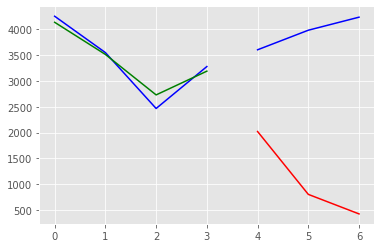

In [133]:
predictions3 = model3.predict(x_test3)                
predictions_train3 = model3.predict(x_train3)         

print(x_train3.shape)                               
print(y_train3.shape)
print(x_test3.shape)
print(y_test3.shape)
print(NN_MN_sku28.shape)

x2_3 = numpy.arange(0, 4, 1)                         
x3_3 = numpy.arange(4, 7, 1)

plt.plot(x2_3, y_train3, color='blue')                
plt.plot(x2_3, predictions_train3, color='green')     
plt.plot(x3_3, y_test3, color='blue')                 
plt.plot(x3_3, predictions3, color='red')             

# redline - прогноз, greenline - подгонка

In [134]:
print(predictions3)

[[2021.0826 ]
 [ 806.62775]
 [ 429.08673]]


In [100]:
# -SKU#30-

In [146]:
MN_sku30 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #30')]
MN_sku30.drop('sku_id', axis=1, inplace=True)
#MN_sku30.iloc[:,1].plot() 

NN_MN_sku30 = pd.DataFrame()                                

for i in range(9,0,-1):                                    
    NN_MN_sku30['t-' + str(i)] = MN_sku30.iloc[:,1].shift(i)
    
NN_MN_sku30['t'] = MN_sku30.iloc[:,1].values                
#print(NN_MN_sku30.head(10))                                 

new_NN_MN_sku30 = NN_MN_sku30[9:]                           
#new_NN_MN_sku30.head()                                     

y4 = new_NN_MN_sku30['t']                                    
x4 = new_NN_MN_sku30.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train4 = x4[:3]                                            
y_train4 = y4[:3]                                            
x_test4 = x4[3:]                                              
y_test4 = y4[3:]

#print(new_NN_MN_sku30.shape)                               
#print(x_train4.shape)
#print(y_train4.shape)
#print(x_test4.shape)
#print(y_test4.shape)
#print(x_train4.head(5))                                     

x_train4 = x_train4.values                                    
y_train4 = y_train4.values
x_test4 = x_test4.values
y_test4 = y_test4.values

# NN

model4 = Sequential()
model4.add(Dense(6, input_dim=9, activation='relu'))       
model4.add(Dense(1, activation='linear'))                   
model4.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model4.fit(x_train4, y_train4, epochs=300, batch_size=None)

Epoch 1/300
3/3 [==============================] - 3s 948ms/step - loss: 1141192.3750 - mean_absolute_percentage_error: 20.2416
Epoch 2/300
3/3 [==============================] - 0s 995us/step - loss: 1079603.7500 - mean_absolute_percentage_error: 20.3378
Epoch 3/300
3/3 [==============================] - 0s 1ms/step - loss: 1024389.0625 - mean_absolute_percentage_error: 20.4176
Epoch 4/300
3/3 [==============================] - 0s 995us/step - loss: 974772.2500 - mean_absolute_percentage_error: 20.4305
Epoch 5/300
3/3 [==============================] - 0s 981us/step - loss: 928918.5625 - mean_absolute_percentage_error: 20.3318
Epoch 6/300
3/3 [==============================] - 0s 1ms/step - loss: 885196.1875 - mean_absolute_percentage_error: 20.1241
Epoch 7/300
3/3 [==============================] - 0s 983us/step - loss: 842770.9375 - mean_absolute_percentage_error: 19.8293
Epoch 8/300
3/3 [==============================] - 0s 1ms/step - loss: 801290.5000 - mean_absolute_percentage_er

Epoch 66/300
3/3 [==============================] - 0s 1ms/step - loss: 328645.7188 - mean_absolute_percentage_error: 12.0396
Epoch 67/300
3/3 [==============================] - 0s 998us/step - loss: 323865.5625 - mean_absolute_percentage_error: 11.9374
Epoch 68/300
3/3 [==============================] - 0s 2ms/step - loss: 319119.4688 - mean_absolute_percentage_error: 11.8339
Epoch 69/300
3/3 [==============================] - 0s 1ms/step - loss: 314408.5938 - mean_absolute_percentage_error: 11.7303
Epoch 70/300
3/3 [==============================] - 0s 2ms/step - loss: 309733.7188 - mean_absolute_percentage_error: 11.6277
Epoch 71/300
3/3 [==============================] - 0s 2ms/step - loss: 305093.3750 - mean_absolute_percentage_error: 11.5271
Epoch 72/300
3/3 [==============================] - 0s 2ms/step - loss: 300487.2812 - mean_absolute_percentage_error: 11.4291
Epoch 73/300
3/3 [==============================] - 0s 997us/step - loss: 295914.5938 - mean_absolute_percentage_err

Epoch 131/300
3/3 [==============================] - 0s 2ms/step - loss: 100772.8125 - mean_absolute_percentage_error: 6.4197
Epoch 132/300
3/3 [==============================] - 0s 1ms/step - loss: 98664.6016 - mean_absolute_percentage_error: 6.3533
Epoch 133/300
3/3 [==============================] - 0s 5ms/step - loss: 96573.6016 - mean_absolute_percentage_error: 6.2760
Epoch 134/300
3/3 [==============================] - 0s 997us/step - loss: 94501.1953 - mean_absolute_percentage_error: 6.1887
Epoch 135/300
3/3 [==============================] - 0s 2ms/step - loss: 92486.8672 - mean_absolute_percentage_error: 6.0988
Epoch 136/300
3/3 [==============================] - 0s 1ms/step - loss: 90526.3359 - mean_absolute_percentage_error: 6.0173
Epoch 137/300
3/3 [==============================] - 0s 997us/step - loss: 88577.3516 - mean_absolute_percentage_error: 5.9374
Epoch 138/300
3/3 [==============================] - 0s 2ms/step - loss: 86645.3047 - mean_absolute_percentage_error: 5.

Epoch 197/300
3/3 [==============================] - 0s 1ms/step - loss: 19922.3066 - mean_absolute_percentage_error: 2.6081
Epoch 198/300
3/3 [==============================] - 0s 664us/step - loss: 19238.1230 - mean_absolute_percentage_error: 2.5730
Epoch 199/300
3/3 [==============================] - 0s 674us/step - loss: 18708.6680 - mean_absolute_percentage_error: 2.5444
Epoch 200/300
3/3 [==============================] - 0s 1ms/step - loss: 18189.7051 - mean_absolute_percentage_error: 2.5101
Epoch 201/300
3/3 [==============================] - 0s 1ms/step - loss: 17673.2480 - mean_absolute_percentage_error: 2.4692
Epoch 202/300
3/3 [==============================] - 0s 1ms/step - loss: 17157.0391 - mean_absolute_percentage_error: 2.4220
Epoch 203/300
3/3 [==============================] - 0s 994us/step - loss: 16677.1953 - mean_absolute_percentage_error: 2.3999
Epoch 204/300
3/3 [==============================] - 0s 1ms/step - loss: 16198.3389 - mean_absolute_percentage_error: 2

Epoch 263/300
3/3 [==============================] - 0s 2ms/step - loss: 3222.1921 - mean_absolute_percentage_error: 1.2695
Epoch 264/300
3/3 [==============================] - 0s 997us/step - loss: 3079.4434 - mean_absolute_percentage_error: 1.2419
Epoch 265/300
3/3 [==============================] - 0s 1ms/step - loss: 3070.7742 - mean_absolute_percentage_error: 1.2345
Epoch 266/300
3/3 [==============================] - 0s 1ms/step - loss: 3037.9343 - mean_absolute_percentage_error: 1.2274
Epoch 267/300
3/3 [==============================] - 0s 1ms/step - loss: 2962.5032 - mean_absolute_percentage_error: 1.2187
Epoch 268/300
3/3 [==============================] - 0s 1ms/step - loss: 2854.6240 - mean_absolute_percentage_error: 1.2079
Epoch 269/300
3/3 [==============================] - 0s 5ms/step - loss: 2731.2168 - mean_absolute_percentage_error: 1.1946
Epoch 270/300
3/3 [==============================] - 0s 1ms/step - loss: 2673.2312 - mean_absolute_percentage_error: 1.1901
Epoch 

In [147]:
scores4 = model4.evaluate(x_test4, y_test4)
y_pred4 = model4.predict(x_test4)          

def smape(y_test4, y_pred4):
    return 100/len(y_test4) * np.sum(2 * np.abs(y_pred4 - y_test4) / (np.abs(y_test4) + np.abs(y_pred4)))

print(smape(y_test4, y_pred4))

3/3 [==============================] - 1s 370ms/step
67.64920213301197


(3, 9)
(3,)
(3, 9)
(3,)
(15, 10)


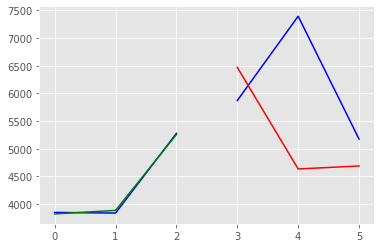

In [148]:
predictions4 = model4.predict(x_test4)                
predictions_train4 = model4.predict(x_train4)         

print(x_train4.shape)                               
print(y_train4.shape)
print(x_test4.shape)
print(y_test4.shape)
print(NN_MN_sku30.shape)

x2_4 = numpy.arange(0, 3, 1)                         
x3_4 = numpy.arange(3, 6, 1)

plt.plot(x2_4, y_train4, color='blue')                
plt.plot(x2_4, predictions_train4, color='green')     
plt.plot(x3_4, y_test4, color='blue')                 
plt.plot(x3_4, predictions4, color='red')             

# redline - прогноз, greenline - подгонка

In [149]:
print(predictions4)

[[6468.3276]
 [4631.644 ]
 [4685.1016]]


In [114]:
# -SKU#31-

In [151]:
MN_sku31 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #31')]
MN_sku31.drop('sku_id', axis=1, inplace=True)
#MN_sku31.iloc[:,1].plot() 

NN_MN_sku31 = pd.DataFrame()                                

for i in range(6,0,-1):                                    
    NN_MN_sku31['t-' + str(i)] = MN_sku31.iloc[:,1].shift(i)
    
NN_MN_sku31['t'] = MN_sku31.iloc[:,1].values                
#print(NN_MN_sku31.head(7))                                 

new_NN_MN_sku31 = NN_MN_sku31[6:]                           
#new_NN_MN_sku31.head()                                     

y5 = new_NN_MN_sku31['t']                                    
x5 = new_NN_MN_sku31.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train5 = x5[:3]                                            
y_train5 = y5[:3]                                            
x_test5 = x5[3:]                                              
y_test5 = y5[3:]

#print(new_NN_MN_sku31.shape)                               
#print(x_train5.shape)
#print(y_train5.shape)
#print(x_test5.shape)
#print(y_test5.shape)
#print(x_train5.head(5))                                     

x_train5 = x_train5.values                                    
y_train5 = y_train5.values
x_test5 = x_test5.values
y_test5 = y_test5.values

# NN

model5 = Sequential()
model5.add(Dense(6, input_dim=6, activation='relu'))       
model5.add(Dense(1, activation='linear'))                   
model5.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model5.fit(x_train5, y_train5, epochs=300, batch_size=None)

Epoch 1/300
3/3 [==============================] - 3s 967ms/step - loss: 69293.6797 - mean_absolute_percentage_error: 40.7121
Epoch 2/300
3/3 [==============================] - 0s 1ms/step - loss: 66731.4375 - mean_absolute_percentage_error: 40.2823
Epoch 3/300
3/3 [==============================] - 0s 997us/step - loss: 64135.9023 - mean_absolute_percentage_error: 39.7843
Epoch 4/300
3/3 [==============================] - 0s 1ms/step - loss: 61796.9688 - mean_absolute_percentage_error: 39.2460
Epoch 5/300
3/3 [==============================] - 0s 1ms/step - loss: 59777.5195 - mean_absolute_percentage_error: 38.6668
Epoch 6/300
3/3 [==============================] - 0s 1ms/step - loss: 57977.1680 - mean_absolute_percentage_error: 38.0260
Epoch 7/300
3/3 [==============================] - 0s 2ms/step - loss: 56489.7617 - mean_absolute_percentage_error: 37.3976
Epoch 8/300
3/3 [==============================] - 0s 1ms/step - loss: 55163.5938 - mean_absolute_percentage_error: 36.7721
Epoc

Epoch 67/300
3/3 [==============================] - 0s 1ms/step - loss: 7512.8726 - mean_absolute_percentage_error: 14.5001
Epoch 68/300
3/3 [==============================] - 0s 997us/step - loss: 7203.0234 - mean_absolute_percentage_error: 14.2404
Epoch 69/300
3/3 [==============================] - 0s 1ms/step - loss: 6949.4043 - mean_absolute_percentage_error: 14.0178
Epoch 70/300
3/3 [==============================] - 0s 1ms/step - loss: 6686.4766 - mean_absolute_percentage_error: 13.7677
Epoch 71/300
3/3 [==============================] - 0s 995us/step - loss: 6414.9106 - mean_absolute_percentage_error: 13.4925
Epoch 72/300
3/3 [==============================] - 0s 993us/step - loss: 6134.7944 - mean_absolute_percentage_error: 13.1922
Epoch 73/300
3/3 [==============================] - 0s 2ms/step - loss: 5854.4199 - mean_absolute_percentage_error: 12.8752
Epoch 74/300
3/3 [==============================] - 0s 2ms/step - loss: 5624.1548 - mean_absolute_percentage_error: 12.5865
Ep

Epoch 134/300
3/3 [==============================] - 0s 2ms/step - loss: 235.7961 - mean_absolute_percentage_error: 2.6490
Epoch 135/300
3/3 [==============================] - 0s 2ms/step - loss: 221.0784 - mean_absolute_percentage_error: 2.5653
Epoch 136/300
3/3 [==============================] - 0s 1ms/step - loss: 206.8613 - mean_absolute_percentage_error: 2.4844
Epoch 137/300
3/3 [==============================] - 0s 2ms/step - loss: 193.2761 - mean_absolute_percentage_error: 2.4065
Epoch 138/300
3/3 [==============================] - 0s 992us/step - loss: 180.3165 - mean_absolute_percentage_error: 2.3311
Epoch 139/300
3/3 [==============================] - 0s 1ms/step - loss: 169.1158 - mean_absolute_percentage_error: 2.2639
Epoch 140/300
3/3 [==============================] - 0s 1ms/step - loss: 158.6697 - mean_absolute_percentage_error: 2.1960
Epoch 141/300
3/3 [==============================] - 0s 997us/step - loss: 148.3745 - mean_absolute_percentage_error: 2.1246
Epoch 142/30

Epoch 201/300
3/3 [==============================] - 0s 2ms/step - loss: 0.9304 - mean_absolute_percentage_error: 0.1688
Epoch 202/300
3/3 [==============================] - 0s 2ms/step - loss: 0.8378 - mean_absolute_percentage_error: 0.1602
Epoch 203/300
3/3 [==============================] - 0s 2ms/step - loss: 0.7536 - mean_absolute_percentage_error: 0.1518
Epoch 204/300
3/3 [==============================] - 0s 997us/step - loss: 0.6770 - mean_absolute_percentage_error: 0.1438
Epoch 205/300
3/3 [==============================] - 0s 2ms/step - loss: 0.6080 - mean_absolute_percentage_error: 0.1364
Epoch 206/300
3/3 [==============================] - 0s 997us/step - loss: 0.5451 - mean_absolute_percentage_error: 0.1291
Epoch 207/300
3/3 [==============================] - 0s 2ms/step - loss: 0.4890 - mean_absolute_percentage_error: 0.1220
Epoch 208/300
3/3 [==============================] - 0s 2ms/step - loss: 0.4379 - mean_absolute_percentage_error: 0.1154
Epoch 209/300
3/3 [=========

Epoch 268/300
3/3 [==============================] - 0s 2ms/step - loss: 1.0873e-05 - mean_absolute_percentage_error: 5.8296e-04
Epoch 269/300
3/3 [==============================] - 0s 993us/step - loss: 1.5470e-05 - mean_absolute_percentage_error: 6.8050e-04
Epoch 270/300
3/3 [==============================] - 0s 997us/step - loss: 2.0020e-05 - mean_absolute_percentage_error: 7.5786e-04
Epoch 271/300
3/3 [==============================] - 0s 3ms/step - loss: 2.4973e-05 - mean_absolute_percentage_error: 8.3835e-04
Epoch 272/300
3/3 [==============================] - 0s 1ms/step - loss: 2.8998e-05 - mean_absolute_percentage_error: 8.9952e-04
Epoch 273/300
3/3 [==============================] - 0s 1ms/step - loss: 3.1863e-05 - mean_absolute_percentage_error: 9.5235e-04
Epoch 274/300
3/3 [==============================] - 0s 2ms/step - loss: 3.3996e-05 - mean_absolute_percentage_error: 9.9426e-04
Epoch 275/300
3/3 [==============================] - 0s 1ms/step - loss: 3.6121e-05 - mean_ab

In [152]:
scores5 = model5.evaluate(x_test5, y_test5)
y_pred5 = model5.predict(x_test5)          

def smape(y_test5, y_pred5):
    return 100/len(y_test5) * np.sum(2 * np.abs(y_pred5 - y_test5) / (np.abs(y_test5) + np.abs(y_pred5)))

print(smape(y_test5, y_pred5))

3/3 [==============================] - 1s 379ms/step
259.5093134214767


(3, 6)
(3,)
(3, 6)
(3,)
(12, 7)


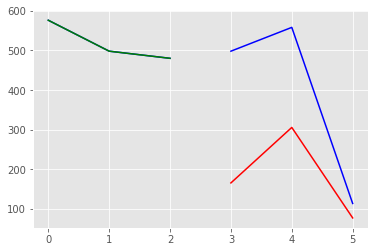

In [153]:
predictions5 = model5.predict(x_test5)                
predictions_train5 = model5.predict(x_train5)         

print(x_train5.shape)                               
print(y_train5.shape)
print(x_test5.shape)
print(y_test5.shape)
print(NN_MN_sku31.shape)

x2_5 = numpy.arange(0, 3, 1)                         
x3_5 = numpy.arange(3, 6, 1)

plt.plot(x2_5, y_train5, color='blue')                
plt.plot(x2_5, predictions_train5, color='green')     
plt.plot(x3_5, y_test5, color='blue')                 
plt.plot(x3_5, predictions5, color='red')             

# redline - прогноз, greenline - подгонка

In [154]:
print(predictions5)

[[165.76903]
 [305.6889 ]
 [ 77.5315 ]]


In [125]:
# -SKU#34-

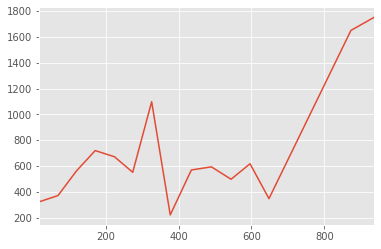

In [126]:
MN_sku34 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #34')]
MN_sku34.drop('sku_id', axis=1, inplace=True)
MN_sku34.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖ в 2019

In [ ]:
# -SKU#37-

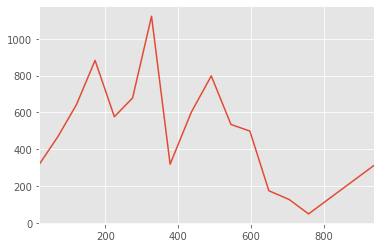

In [127]:
MN_sku37 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #37')]
MN_sku37.drop('sku_id', axis=1, inplace=True)
MN_sku37.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖ в 2019

In [ ]:
# -SKU#41-

In [156]:
MN_sku41 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #41')]
MN_sku41.drop('sku_id', axis=1, inplace=True)
#MN_sku41.iloc[:,1].plot() 

NN_MN_sku41 = pd.DataFrame()                                

for i in range(6,0,-1):                                    
    NN_MN_sku41['t-' + str(i)] = MN_sku41.iloc[:,1].shift(i)
    
NN_MN_sku41['t'] = MN_sku41.iloc[:,1].values                
#print(NN_MN_sku41.head(7))                                 

new_NN_MN_sku41 = NN_MN_sku41[6:]                           
#new_NN_MN_sku41.head()                                     

y6 = new_NN_MN_sku41['t']                                    
x6 = new_NN_MN_sku41.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train6 = x6[:4]                                            
y_train6 = y6[:4]                                            
x_test6 = x6[4:]                                              
y_test6 = y6[4:]

#print(new_NN_MN_sku41.shape)                               
#print(x_train6.shape)
#print(y_train6.shape)
#print(x_test6.shape)
#print(y_test6.shape)
#print(x_train6.head(5))                                     

x_train6 = x_train6.values                                    
y_train6 = y_train6.values
x_test6 = x_test6.values
y_test6 = y_test6.values

# NN

model6 = Sequential()
model6.add(Dense(6, input_dim=6, activation='relu'))       
model6.add(Dense(1, activation='linear'))                   
model6.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model6.fit(x_train6, y_train6, epochs=300, batch_size=None)

Epoch 1/300
4/4 [==============================] - 3s 733ms/step - loss: 15471.3984 - mean_absolute_percentage_error: 7.5377
Epoch 2/300
4/4 [==============================] - 0s 742us/step - loss: 13913.3975 - mean_absolute_percentage_error: 7.2295
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 12429.7910 - mean_absolute_percentage_error: 7.4576
Epoch 4/300
4/4 [==============================] - 0s 993us/step - loss: 11215.5098 - mean_absolute_percentage_error: 7.6905
Epoch 5/300
4/4 [==============================] - 0s 991us/step - loss: 10332.2002 - mean_absolute_percentage_error: 7.9136
Epoch 6/300
4/4 [==============================] - 0s 742us/step - loss: 9783.4697 - mean_absolute_percentage_error: 8.4445
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 9532.6357 - mean_absolute_percentage_error: 9.2745
Epoch 8/300
4/4 [==============================] - 0s 997us/step - loss: 9507.6094 - mean_absolute_percentage_error: 9.9947
Epoch 9

Epoch 67/300
4/4 [==============================] - 0s 1ms/step - loss: 3832.0059 - mean_absolute_percentage_error: 5.8962
Epoch 68/300
4/4 [==============================] - 0s 998us/step - loss: 3767.0835 - mean_absolute_percentage_error: 5.8112
Epoch 69/300
4/4 [==============================] - 0s 1ms/step - loss: 3707.4353 - mean_absolute_percentage_error: 5.7427
Epoch 70/300
4/4 [==============================] - 0s 499us/step - loss: 3641.5264 - mean_absolute_percentage_error: 5.6651
Epoch 71/300
4/4 [==============================] - 0s 997us/step - loss: 3580.8008 - mean_absolute_percentage_error: 5.5860
Epoch 72/300
4/4 [==============================] - 0s 1ms/step - loss: 3519.8025 - mean_absolute_percentage_error: 5.5268
Epoch 73/300
4/4 [==============================] - 0s 3ms/step - loss: 3454.4954 - mean_absolute_percentage_error: 5.4849
Epoch 74/300
4/4 [==============================] - 0s 1ms/step - loss: 3389.0513 - mean_absolute_percentage_error: 5.4595
Epoch 75/3

Epoch 133/300
4/4 [==============================] - 0s 1ms/step - loss: 986.0923 - mean_absolute_percentage_error: 3.0231
Epoch 134/300
4/4 [==============================] - 0s 748us/step - loss: 966.0288 - mean_absolute_percentage_error: 2.9989
Epoch 135/300
4/4 [==============================] - 0s 1ms/step - loss: 940.9717 - mean_absolute_percentage_error: 2.9577
Epoch 136/300
4/4 [==============================] - 0s 741us/step - loss: 918.9139 - mean_absolute_percentage_error: 2.9193
Epoch 137/300
4/4 [==============================] - 0s 754us/step - loss: 896.4098 - mean_absolute_percentage_error: 2.8814
Epoch 138/300
4/4 [==============================] - 0s 989us/step - loss: 876.6647 - mean_absolute_percentage_error: 2.8475
Epoch 139/300
4/4 [==============================] - 0s 988us/step - loss: 856.1567 - mean_absolute_percentage_error: 2.8161
Epoch 140/300
4/4 [==============================] - 0s 989us/step - loss: 833.5414 - mean_absolute_percentage_error: 2.7858
Epoc

Epoch 200/300
4/4 [==============================] - 0s 2ms/step - loss: 159.5715 - mean_absolute_percentage_error: 1.3227
Epoch 201/300
4/4 [==============================] - 0s 7ms/step - loss: 154.8621 - mean_absolute_percentage_error: 1.3070
Epoch 202/300
4/4 [==============================] - 0s 997us/step - loss: 150.7351 - mean_absolute_percentage_error: 1.2912
Epoch 203/300
4/4 [==============================] - 0s 1ms/step - loss: 145.5356 - mean_absolute_percentage_error: 1.2663
Epoch 204/300
4/4 [==============================] - 0s 991us/step - loss: 140.9454 - mean_absolute_percentage_error: 1.2430
Epoch 205/300
4/4 [==============================] - 0s 754us/step - loss: 136.6736 - mean_absolute_percentage_error: 1.2204
Epoch 206/300
4/4 [==============================] - 0s 754us/step - loss: 132.5109 - mean_absolute_percentage_error: 1.1987
Epoch 207/300
4/4 [==============================] - 0s 505us/step - loss: 128.6042 - mean_absolute_percentage_error: 1.1796
Epoch 

Epoch 267/300
4/4 [==============================] - 0s 996us/step - loss: 15.6120 - mean_absolute_percentage_error: 0.4327
Epoch 268/300
4/4 [==============================] - 0s 745us/step - loss: 15.0277 - mean_absolute_percentage_error: 0.4219
Epoch 269/300
4/4 [==============================] - 0s 2ms/step - loss: 14.4810 - mean_absolute_percentage_error: 0.4115
Epoch 270/300
4/4 [==============================] - 0s 1ms/step - loss: 13.9581 - mean_absolute_percentage_error: 0.4019
Epoch 271/300
4/4 [==============================] - 0s 1ms/step - loss: 13.4400 - mean_absolute_percentage_error: 0.3933
Epoch 272/300
4/4 [==============================] - 0s 1ms/step - loss: 12.9173 - mean_absolute_percentage_error: 0.3858
Epoch 273/300
4/4 [==============================] - 0s 747us/step - loss: 12.3929 - mean_absolute_percentage_error: 0.3792
Epoch 274/300
4/4 [==============================] - 0s 990us/step - loss: 11.8774 - mean_absolute_percentage_error: 0.3735
Epoch 275/300
4/

In [157]:
scores6 = model6.evaluate(x_test6, y_test6)
y_pred6 = model6.predict(x_test6)          

def smape(y_test6, y_pred6):
    return 100/len(y_test6) * np.sum(2 * np.abs(y_pred6 - y_test6) / (np.abs(y_test6) + np.abs(y_pred6)))

print(smape(y_test6, y_pred6))

3/3 [==============================] - 1s 399ms/step
182.42789300253094


(4, 6)
(4,)
(3, 6)
(3,)
(13, 7)


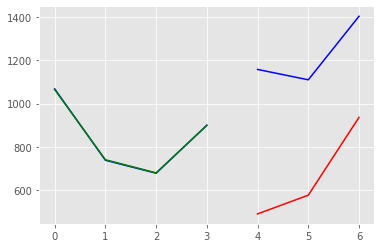

In [158]:
predictions6 = model6.predict(x_test6)                
predictions_train6 = model6.predict(x_train6)         

print(x_train6.shape)                               
print(y_train6.shape)
print(x_test6.shape)
print(y_test6.shape)
print(NN_MN_sku41.shape)

x2_6 = numpy.arange(0, 4, 1)                         
x3_6 = numpy.arange(4, 7, 1)

plt.plot(x2_6, y_train6, color='blue')                
plt.plot(x2_6, predictions_train6, color='green')     
plt.plot(x3_6, y_test6, color='blue')                 
plt.plot(x3_6, predictions6, color='red')             

# redline - прогноз, greenline - подгонка

In [159]:
print(predictions6)

[[489.70618]
 [576.30725]
 [936.4112 ]]


In [ ]:
# -SKU#43-

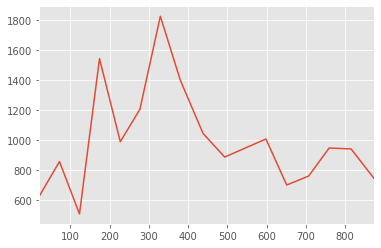

In [137]:
MN_sku43 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #43')]
MN_sku43.drop('sku_id', axis=1, inplace=True)
MN_sku43.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖ В 2019

In [138]:
# -SKU#44-

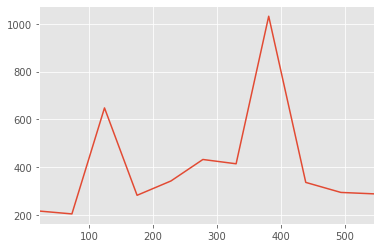

In [139]:
MN_sku44 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #44')]
MN_sku44.drop('sku_id', axis=1, inplace=True)
MN_sku44.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖ В 2019

In [ ]:
# -SKU#46-

In [170]:
MN_sku46 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #46')]
MN_sku46.drop('sku_id', axis=1, inplace=True)
#MN_sku46.iloc[:,1].plot() 

NN_MN_sku46 = pd.DataFrame()                                

for i in range(5,0,-1):                                    
    NN_MN_sku46['t-' + str(i)] = MN_sku46.iloc[:,1].shift(i)
    
NN_MN_sku46['t'] = MN_sku46.iloc[:,1].values                
#print(NN_MN_sku46.head(6))                                 

new_NN_MN_sku46 = NN_MN_sku46[5:]                           
#new_NN_MN_sku46.head()                                     

y7 = new_NN_MN_sku46['t']                                    
x7 = new_NN_MN_sku46.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train7 = x7[:3]                                            
y_train7 = y7[:3]                                            
x_test7 = x7[3:]                                              
y_test7 = y7[3:]

#print(new_NN_MN_sku46.shape)                               
#print(x_train7.shape)
#print(y_train7.shape)
#print(x_test7.shape)
#print(y_test7.shape)
#print(x_train7.head(5))                                     

x_train7 = x_train7.values                                    
y_train7 = y_train7.values
x_test7 = x_test7.values
y_test7 = y_test7.values

# NN

model7 = Sequential()
model7.add(Dense(6, input_dim=5, activation='relu'))       
model7.add(Dense(1, activation='linear'))                   
model7.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model7.fit(x_train7, y_train7, epochs=300, batch_size=None)

Epoch 1/300
3/3 [==============================] - 3s 1s/step - loss: 35504.2266 - mean_absolute_percentage_error: 7.5391
Epoch 2/300
3/3 [==============================] - 0s 998us/step - loss: 33599.8789 - mean_absolute_percentage_error: 7.1769
Epoch 3/300
3/3 [==============================] - 0s 1ms/step - loss: 32666.4688 - mean_absolute_percentage_error: 6.9135
Epoch 4/300
3/3 [==============================] - 0s 1ms/step - loss: 31526.7715 - mean_absolute_percentage_error: 6.6718
Epoch 5/300
3/3 [==============================] - 0s 1ms/step - loss: 30259.6816 - mean_absolute_percentage_error: 6.4777
Epoch 6/300
3/3 [==============================] - 0s 1ms/step - loss: 28988.8340 - mean_absolute_percentage_error: 6.3212
Epoch 7/300
3/3 [==============================] - 0s 2ms/step - loss: 27679.7500 - mean_absolute_percentage_error: 6.1745
Epoch 8/300
3/3 [==============================] - 0s 4ms/step - loss: 26460.9375 - mean_absolute_percentage_error: 6.0363
Epoch 9/300
3/3

Epoch 68/300
3/3 [==============================] - 0s 2ms/step - loss: 10.6112 - mean_absolute_percentage_error: 0.1230
Epoch 69/300
3/3 [==============================] - 0s 1ms/step - loss: 6.4213 - mean_absolute_percentage_error: 0.0990
Epoch 70/300
3/3 [==============================] - 0s 665us/step - loss: 3.4965 - mean_absolute_percentage_error: 0.0756
Epoch 71/300
3/3 [==============================] - 0s 998us/step - loss: 1.5604 - mean_absolute_percentage_error: 0.0528
Epoch 72/300
3/3 [==============================] - 0s 2ms/step - loss: 0.4806 - mean_absolute_percentage_error: 0.0307
Epoch 73/300
3/3 [==============================] - 0s 1ms/step - loss: 0.1403 - mean_absolute_percentage_error: 0.0167
Epoch 74/300
3/3 [==============================] - 0s 997us/step - loss: 0.3430 - mean_absolute_percentage_error: 0.0157
Epoch 75/300
3/3 [==============================] - 0s 1ms/step - loss: 0.8805 - mean_absolute_percentage_error: 0.0298
Epoch 76/300
3/3 [===============

Epoch 136/300
3/3 [==============================] - 0s 997us/step - loss: 0.0560 - mean_absolute_percentage_error: 0.0085
Epoch 137/300
3/3 [==============================] - 0s 665us/step - loss: 0.0581 - mean_absolute_percentage_error: 0.0086
Epoch 138/300
3/3 [==============================] - 0s 2ms/step - loss: 0.0592 - mean_absolute_percentage_error: 0.0087
Epoch 139/300
3/3 [==============================] - 0s 2ms/step - loss: 0.0596 - mean_absolute_percentage_error: 0.0087
Epoch 140/300
3/3 [==============================] - 0s 1ms/step - loss: 0.0590 - mean_absolute_percentage_error: 0.0087
Epoch 141/300
3/3 [==============================] - 0s 665us/step - loss: 0.0576 - mean_absolute_percentage_error: 0.0085
Epoch 142/300
3/3 [==============================] - 0s 2ms/step - loss: 0.0555 - mean_absolute_percentage_error: 0.0083
Epoch 143/300
3/3 [==============================] - 0s 997us/step - loss: 0.0529 - mean_absolute_percentage_error: 0.0081
Epoch 144/300
3/3 [=====

Epoch 201/300
3/3 [==============================] - 0s 2ms/step - loss: 6.0106e-05 - mean_absolute_percentage_error: 2.9008e-04
Epoch 202/300
3/3 [==============================] - 0s 997us/step - loss: 4.4684e-05 - mean_absolute_percentage_error: 2.4299e-04
Epoch 203/300
3/3 [==============================] - 0s 997us/step - loss: 3.1039e-05 - mean_absolute_percentage_error: 1.9556e-04
Epoch 204/300
3/3 [==============================] - 0s 2ms/step - loss: 2.1363e-05 - mean_absolute_percentage_error: 1.6293e-04
Epoch 205/300
3/3 [==============================] - 0s 1ms/step - loss: 1.3252e-05 - mean_absolute_percentage_error: 1.2714e-04
Epoch 206/300
3/3 [==============================] - 0s 1ms/step - loss: 7.8082e-06 - mean_absolute_percentage_error: 1.0240e-04
Epoch 207/300
3/3 [==============================] - 0s 2ms/step - loss: 3.4571e-06 - mean_absolute_percentage_error: 7.3229e-05
Epoch 208/300
3/3 [==============================] - 0s 1ms/step - loss: 1.6689e-06 - mean_ab

Epoch 265/300
3/3 [==============================] - 0s 997us/step - loss: 9.9341e-08 - mean_absolute_percentage_error: 1.1953e-05
Epoch 266/300
3/3 [==============================] - 0s 989us/step - loss: 7.9473e-08 - mean_absolute_percentage_error: 8.1954e-06
Epoch 267/300
3/3 [==============================] - 0s 1ms/step - loss: 9.9341e-08 - mean_absolute_percentage_error: 1.1953e-05
Epoch 268/300
3/3 [==============================] - 0s 2ms/step - loss: 9.9341e-08 - mean_absolute_percentage_error: 1.1953e-05
Epoch 269/300
3/3 [==============================] - 0s 1ms/step - loss: 9.9341e-08 - mean_absolute_percentage_error: 1.1144e-05
Epoch 270/300
3/3 [==============================] - 0s 2ms/step - loss: 3.9736e-08 - mean_absolute_percentage_error: 7.0463e-06
Epoch 271/300
3/3 [==============================] - 0s 1ms/step - loss: 1.0431e-07 - mean_absolute_percentage_error: 1.1703e-05
Epoch 272/300
3/3 [==============================] - 0s 997us/step - loss: 1.0431e-07 - mean_

In [171]:
scores7 = model7.evaluate(x_test7, y_test7)
y_pred7 = model7.predict(x_test7)          

def smape(y_test7, y_pred7):
    return 100/len(y_test7) * np.sum(2 * np.abs(y_pred7 - y_test7) / (np.abs(y_test7) + np.abs(y_pred7)))

print(smape(y_test7, y_pred7))

3/3 [==============================] - 1s 443ms/step
196.91693315179072


(3, 5)
(3,)
(3, 5)
(3,)
(11, 6)


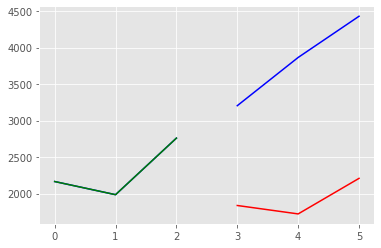

In [172]:
predictions7 = model7.predict(x_test7)                
predictions_train7 = model7.predict(x_train7)         

print(x_train7.shape)                               
print(y_train7.shape)
print(x_test7.shape)
print(y_test7.shape)
print(NN_MN_sku46.shape)

x2_7 = numpy.arange(0, 3, 1)                         
x3_7 = numpy.arange(3, 6, 1)

plt.plot(x2_7, y_train7, color='blue')                
plt.plot(x2_7, predictions_train7, color='green')     
plt.plot(x3_7, y_test7, color='blue')                 
plt.plot(x3_7, predictions7, color='red')             

# redline - прогноз, greenline - подгонка

In [173]:
print(predictions7)

[[1837.9928]
 [1722.7428]
 [2209.4143]]


In [ ]:
# -SKU#48-

In [174]:
MN_sku48 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #48')]
MN_sku48.drop('sku_id', axis=1, inplace=True)
#MN_sku48.iloc[:,1].plot() 

NN_MN_sku48 = pd.DataFrame()                                

for i in range(7,0,-1):                                    
    NN_MN_sku48['t-' + str(i)] = MN_sku48.iloc[:,1].shift(i)
    
NN_MN_sku48['t'] = MN_sku48.iloc[:,1].values                
#print(NN_MN_sku48.head(8))                                 

new_NN_MN_sku48 = NN_MN_sku48[7:]                           
#new_NN_MN_sku48.head()                                     

y8 = new_NN_MN_sku48['t']                                    
x8 = new_NN_MN_sku48.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train8 = x8[:4]                                            
y_train8 = y8[:4]                                            
x_test8 = x8[4:]                                              
y_test8 = y8[4:]

#print(new_NN_MN_sku48.shape)                               
#print(x_train8.shape)
#print(y_train8.shape)
#print(x_test8.shape)
#print(y_test8.shape)
#print(x_train8.head(5))                                     

x_train8 = x_train8.values                                    
y_train8 = y_train8.values
x_test8 = x_test8.values
y_test8 = y_test8.values

# NN

model8 = Sequential()
model8.add(Dense(6, input_dim=7, activation='relu'))       
model8.add(Dense(1, activation='linear'))                   
model8.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model8.fit(x_train8, y_train8, epochs=300, batch_size=None)

Epoch 1/300
4/4 [==============================] - 3s 840ms/step - loss: 2291194.0000 - mean_absolute_percentage_error: 48.3049
Epoch 2/300
4/4 [==============================] - 0s 998us/step - loss: 2217980.7500 - mean_absolute_percentage_error: 47.3358
Epoch 3/300
4/4 [==============================] - 0s 997us/step - loss: 2133808.0000 - mean_absolute_percentage_error: 46.7487
Epoch 4/300
4/4 [==============================] - 0s 748us/step - loss: 2045031.0000 - mean_absolute_percentage_error: 46.0716
Epoch 5/300
4/4 [==============================] - 0s 744us/step - loss: 1958632.8750 - mean_absolute_percentage_error: 45.3870
Epoch 6/300
4/4 [==============================] - 0s 994us/step - loss: 1874828.5000 - mean_absolute_percentage_error: 44.6963
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 1793822.5000 - mean_absolute_percentage_error: 44.0010
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 1715776.2500 - mean_absolute_percen

Epoch 66/300
4/4 [==============================] - 0s 995us/step - loss: 357611.5000 - mean_absolute_percentage_error: 17.8849
Epoch 67/300
4/4 [==============================] - 0s 748us/step - loss: 349912.6875 - mean_absolute_percentage_error: 17.7342
Epoch 68/300
4/4 [==============================] - 0s 997us/step - loss: 342383.6875 - mean_absolute_percentage_error: 17.5846
Epoch 69/300
4/4 [==============================] - 0s 999us/step - loss: 335019.2812 - mean_absolute_percentage_error: 17.4360
Epoch 70/300
4/4 [==============================] - 0s 748us/step - loss: 327765.8125 - mean_absolute_percentage_error: 17.2873
Epoch 71/300
4/4 [==============================] - 0s 1ms/step - loss: 320717.3750 - mean_absolute_percentage_error: 17.1407
Epoch 72/300
4/4 [==============================] - 0s 499us/step - loss: 313819.7500 - mean_absolute_percentage_error: 16.9949
Epoch 73/300
4/4 [==============================] - 0s 997us/step - loss: 307067.9062 - mean_absolute_perc

Epoch 131/300
4/4 [==============================] - 0s 748us/step - loss: 82834.8594 - mean_absolute_percentage_error: 9.8712
Epoch 132/300
4/4 [==============================] - 0s 748us/step - loss: 80933.8750 - mean_absolute_percentage_error: 9.7747
Epoch 133/300
4/4 [==============================] - 0s 996us/step - loss: 79076.1562 - mean_absolute_percentage_error: 9.6790
Epoch 134/300
4/4 [==============================] - 0s 746us/step - loss: 77260.9766 - mean_absolute_percentage_error: 9.5840
Epoch 135/300
4/4 [==============================] - 0s 751us/step - loss: 75487.3828 - mean_absolute_percentage_error: 9.4899
Epoch 136/300
4/4 [==============================] - 0s 748us/step - loss: 73754.5547 - mean_absolute_percentage_error: 9.3966
Epoch 137/300
4/4 [==============================] - 0s 499us/step - loss: 72061.6484 - mean_absolute_percentage_error: 9.3040
Epoch 138/300
4/4 [==============================] - 0s 1ms/step - loss: 70408.0703 - mean_absolute_percentage_

Epoch 196/300
4/4 [==============================] - 0s 995us/step - loss: 20116.5391 - mean_absolute_percentage_error: 5.1490
Epoch 197/300
4/4 [==============================] - 0s 997us/step - loss: 19754.4609 - mean_absolute_percentage_error: 5.0989
Epoch 198/300
4/4 [==============================] - 0s 1ms/step - loss: 19402.3730 - mean_absolute_percentage_error: 5.0494
Epoch 199/300
4/4 [==============================] - 0s 997us/step - loss: 19060.1055 - mean_absolute_percentage_error: 5.0005
Epoch 200/300
4/4 [==============================] - 0s 1ms/step - loss: 18727.2188 - mean_absolute_percentage_error: 4.9522
Epoch 201/300
4/4 [==============================] - 0s 997us/step - loss: 18403.6426 - mean_absolute_percentage_error: 4.9044
Epoch 202/300
4/4 [==============================] - 0s 748us/step - loss: 18089.0586 - mean_absolute_percentage_error: 4.8573
Epoch 203/300
4/4 [==============================] - 0s 1ms/step - loss: 17783.2344 - mean_absolute_percentage_erro

Epoch 261/300
4/4 [==============================] - 0s 748us/step - loss: 9215.0273 - mean_absolute_percentage_error: 3.0712
Epoch 262/300
4/4 [==============================] - 0s 1ms/step - loss: 9155.3418 - mean_absolute_percentage_error: 3.0714
Epoch 263/300
4/4 [==============================] - 0s 1ms/step - loss: 9097.0781 - mean_absolute_percentage_error: 3.0714
Epoch 264/300
4/4 [==============================] - 0s 1ms/step - loss: 9040.1729 - mean_absolute_percentage_error: 3.0714
Epoch 265/300
4/4 [==============================] - 0s 1ms/step - loss: 8984.5918 - mean_absolute_percentage_error: 3.0713
Epoch 266/300
4/4 [==============================] - 0s 1ms/step - loss: 8930.3203 - mean_absolute_percentage_error: 3.0711
Epoch 267/300
4/4 [==============================] - 0s 997us/step - loss: 8877.2910 - mean_absolute_percentage_error: 3.0708
Epoch 268/300
4/4 [==============================] - 0s 2ms/step - loss: 8825.4062 - mean_absolute_percentage_error: 3.0705
Epoc

In [175]:
scores8 = model8.evaluate(x_test8, y_test8)
y_pred8 = model8.predict(x_test8)          

def smape(y_test8, y_pred8):
    return 100/len(y_test8) * np.sum(2 * np.abs(y_pred8 - y_test8) / (np.abs(y_test8) + np.abs(y_pred8)))

print(smape(y_test8, y_pred8))

3/3 [==============================] - 1s 435ms/step
195.32923738503635


(4, 7)
(4,)
(3, 7)
(3,)
(14, 8)


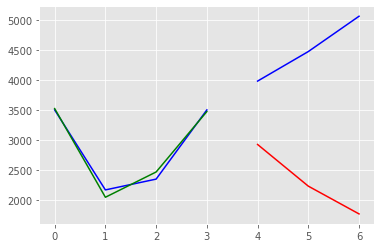

In [176]:
predictions8 = model8.predict(x_test8)                
predictions_train8 = model8.predict(x_train8)         

print(x_train8.shape)                               
print(y_train8.shape)
print(x_test8.shape)
print(y_test8.shape)
print(NN_MN_sku48.shape)

x2_8 = numpy.arange(0, 4, 1)                         
x3_8 = numpy.arange(4, 7, 1)

plt.plot(x2_8, y_train8, color='blue')                
plt.plot(x2_8, predictions_train8, color='green')     
plt.plot(x3_8, y_test8, color='blue')                 
plt.plot(x3_8, predictions8, color='red')             

# redline - прогноз, greenline - подгонка

In [177]:
print(predictions8)

[[2928.985 ]
 [2234.7866]
 [1772.3223]]


In [192]:
# -SKU#72-

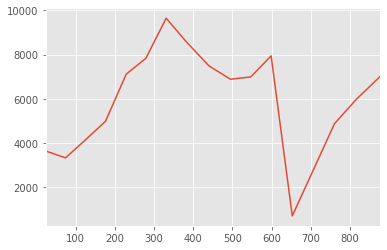

In [193]:
MN_sku72 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #72')]
MN_sku72.drop('sku_id', axis=1, inplace=True)
MN_sku72.iloc[:,1].plot() 
# ВЫХОДИТ ИЗ ПРОДАЖ В 2019

In [194]:
# -SKU#73-

(9, 2)


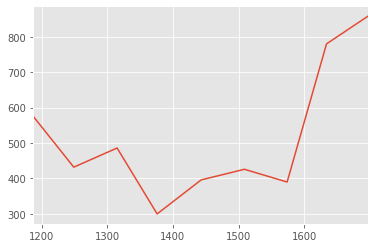

In [11]:
MN_sku73 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #73')]
MN_sku73.drop('sku_id', axis=1, inplace=True)
MN_sku73.iloc[:,1].plot() 

print(MN_sku73.shape)

# Из-за малого количества данных, я не могу составить адекватный прогноз. Я сам то в него не поверю....

In [278]:
# -SKU#76-

In [187]:
MN_sku76 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #76')]
MN_sku76.drop('sku_id', axis=1, inplace=True)
#MN_sku76.iloc[:,1].plot() 

NN_MN_sku76 = pd.DataFrame()                                

for i in range(7,0,-1):                                    
    NN_MN_sku76['t-' + str(i)] = MN_sku76.iloc[:,1].shift(i)
    
NN_MN_sku76['t'] = MN_sku76.iloc[:,1].values                
#print(NN_MN_sku76.head(8))                                 

new_NN_MN_sku76 = NN_MN_sku76[7:]                           
#new_NN_MN_sku76.head()                                     

y10 = new_NN_MN_sku76['t']                                    
x10 = new_NN_MN_sku76.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train10 = x10[:5]                                            
y_train10 = y10[:5]                                            
x_test10 = x10[5:]                                              
y_test10 = y10[5:]

#print(new_NN_MN_sku76.shape)                               
#print(x_train10.shape)
#print(y_train10.shape)
#print(x_test10.shape)
#print(y_test10.shape)
#print(x_train10.head(5))                                     

x_train10 = x_train10.values                                    
y_train10 = y_train10.values
x_test10 = x_test10.values
y_test10 = y_test10.values

# NN

model10 = Sequential()
model10.add(Dense(6, input_dim=7, activation='relu'))       
model10.add(Dense(1, activation='linear'))                   
model10.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model10.fit(x_train10, y_train10, epochs=300, batch_size=None)

Epoch 1/300
5/5 [==============================] - 4s 725ms/step - loss: 12126.5693 - mean_absolute_percentage_error: 34.8587
Epoch 2/300
5/5 [==============================] - 0s 996us/step - loss: 11763.8916 - mean_absolute_percentage_error: 34.2140
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 11286.9102 - mean_absolute_percentage_error: 33.3478
Epoch 4/300
5/5 [==============================] - 0s 1ms/step - loss: 10822.0801 - mean_absolute_percentage_error: 32.4822
Epoch 5/300
5/5 [==============================] - 0s 990us/step - loss: 10369.6309 - mean_absolute_percentage_error: 31.6177
Epoch 6/300
5/5 [==============================] - 0s 6ms/step - loss: 9948.3564 - mean_absolute_percentage_error: 30.7918
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 9520.6826 - mean_absolute_percentage_error: 29.9308
Epoch 8/300
5/5 [==============================] - 0s 795us/step - loss: 9114.4541 - mean_absolute_percentage_error: 29.0903
Epo

Epoch 67/300
5/5 [==============================] - 0s 1ms/step - loss: 1612.1891 - mean_absolute_percentage_error: 12.5997
Epoch 68/300
5/5 [==============================] - 0s 798us/step - loss: 1603.9990 - mean_absolute_percentage_error: 12.5828
Epoch 69/300
5/5 [==============================] - 0s 6ms/step - loss: 1595.9783 - mean_absolute_percentage_error: 12.5659
Epoch 70/300
5/5 [==============================] - 0s 3ms/step - loss: 1588.1006 - mean_absolute_percentage_error: 12.5488
Epoch 71/300
5/5 [==============================] - 0s 788us/step - loss: 1580.3434 - mean_absolute_percentage_error: 12.5313
Epoch 72/300
5/5 [==============================] - 0s 998us/step - loss: 1572.7772 - mean_absolute_percentage_error: 12.5137
Epoch 73/300
5/5 [==============================] - 0s 798us/step - loss: 1565.4120 - mean_absolute_percentage_error: 12.4958
Epoch 74/300
5/5 [==============================] - 0s 997us/step - loss: 1558.2493 - mean_absolute_percentage_error: 12.477

5/5 [==============================] - 0s 1ms/step - loss: 1193.1542 - mean_absolute_percentage_error: 10.9930
Epoch 133/300
5/5 [==============================] - 0s 793us/step - loss: 1186.6345 - mean_absolute_percentage_error: 10.9630
Epoch 134/300
5/5 [==============================] - 0s 1ms/step - loss: 1180.1121 - mean_absolute_percentage_error: 10.9329
Epoch 135/300
5/5 [==============================] - 0s 598us/step - loss: 1173.6111 - mean_absolute_percentage_error: 10.9027
Epoch 136/300
5/5 [==============================] - 0s 796us/step - loss: 1167.1090 - mean_absolute_percentage_error: 10.8725
Epoch 137/300
5/5 [==============================] - 0s 992us/step - loss: 1160.6058 - mean_absolute_percentage_error: 10.8421
Epoch 138/300
5/5 [==============================] - 0s 798us/step - loss: 1154.1002 - mean_absolute_percentage_error: 10.8116
Epoch 139/300
5/5 [==============================] - 0s 1ms/step - loss: 1147.5961 - mean_absolute_percentage_error: 10.7810
Epoc

Epoch 198/300
5/5 [==============================] - 0s 793us/step - loss: 773.9712 - mean_absolute_percentage_error: 8.8098
Epoch 199/300
5/5 [==============================] - 0s 798us/step - loss: 767.9995 - mean_absolute_percentage_error: 8.7744
Epoch 200/300
5/5 [==============================] - 0s 597us/step - loss: 762.0463 - mean_absolute_percentage_error: 8.7390
Epoch 201/300
5/5 [==============================] - 0s 993us/step - loss: 756.1096 - mean_absolute_percentage_error: 8.7035
Epoch 202/300
5/5 [==============================] - 0s 797us/step - loss: 750.1791 - mean_absolute_percentage_error: 8.6680
Epoch 203/300
5/5 [==============================] - 0s 598us/step - loss: 744.2787 - mean_absolute_percentage_error: 8.6325
Epoch 204/300
5/5 [==============================] - 0s 597us/step - loss: 738.3985 - mean_absolute_percentage_error: 8.5969
Epoch 205/300
5/5 [==============================] - 0s 2ms/step - loss: 732.5358 - mean_absolute_percentage_error: 8.5613
Ep

Epoch 264/300
5/5 [==============================] - 0s 1ms/step - loss: 426.9153 - mean_absolute_percentage_error: 6.4543
Epoch 265/300
5/5 [==============================] - 0s 1ms/step - loss: 422.5074 - mean_absolute_percentage_error: 6.4192
Epoch 266/300
5/5 [==============================] - 0s 597us/step - loss: 418.1353 - mean_absolute_percentage_error: 6.3843
Epoch 267/300
5/5 [==============================] - 0s 803us/step - loss: 413.7917 - mean_absolute_percentage_error: 6.3494
Epoch 268/300
5/5 [==============================] - 0s 1ms/step - loss: 409.4756 - mean_absolute_percentage_error: 6.3146
Epoch 269/300
5/5 [==============================] - 0s 992us/step - loss: 405.1874 - mean_absolute_percentage_error: 6.2798
Epoch 270/300
5/5 [==============================] - 0s 997us/step - loss: 400.9291 - mean_absolute_percentage_error: 6.2451
Epoch 271/300
5/5 [==============================] - 0s 796us/step - loss: 396.6904 - mean_absolute_percentage_error: 6.2104
Epoch 

In [188]:
scores10 = model10.evaluate(x_test10, y_test10)
y_pred10 = model10.predict(x_test10)          

def smape(y_test10, y_pred10):
    return 100/len(y_test10) * np.sum(2 * np.abs(y_pred10 - y_test10) / (np.abs(y_test10) + np.abs(y_pred10)))

print(smape(y_test10, y_pred10))

3/3 [==============================] - 1s 498ms/step
184.61490240175144


(5, 7)
(5,)
(3, 7)
(3,)
(15, 8)


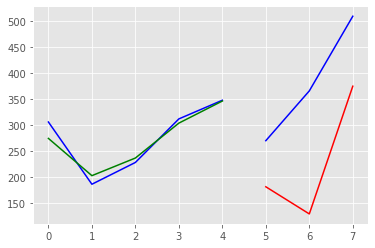

In [189]:
predictions10 = model10.predict(x_test10)                
predictions_train10 = model10.predict(x_train10)         

print(x_train10.shape)                               
print(y_train10.shape)
print(x_test10.shape)
print(y_test10.shape)
print(NN_MN_sku76.shape)

x2_10 = numpy.arange(0, 5, 1)                         
x3_10 = numpy.arange(5, 8, 1)

plt.plot(x2_10, y_train10, color='blue')                
plt.plot(x2_10, predictions_train10, color='green')     
plt.plot(x3_10, y_test10, color='blue')                 
plt.plot(x3_10, predictions10, color='red')             

# redline - прогноз, greenline - подгонка

In [190]:
print(predictions10)

[[181.08662]
 [128.74918]
 [375.04443]]


In [354]:
# -SKU#77-

In [234]:
MN_sku77 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #77')]
MN_sku77.drop('sku_id', axis=1, inplace=True)
#MN_sku77.iloc[:,1].plot() 

NN_MN_sku77 = pd.DataFrame()                                

for i in range(7,0,-1):                                    
    NN_MN_sku77['t-' + str(i)] = MN_sku77.iloc[:,1].shift(i)
    
NN_MN_sku77['t'] = MN_sku77.iloc[:,1].values                
#print(NN_MN_sku77.head(8))                                 

new_NN_MN_sku77 = NN_MN_sku77[7:]                           
#new_NN_MN_sku77.head()                                     

y11 = new_NN_MN_sku77['t']                                    
x11 = new_NN_MN_sku77.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train11 = x11[:5]                                            
y_train11 = y11[:5]                                            
x_test11 = x11[5:]                                              
y_test11 = y11[5:]

#print(new_NN_MN_sku77.shape)                               
#print(x_train11.shape)
#print(y_train11.shape)
#print(x_test11.shape)
#print(y_test11.shape)
#print(x_train11.head(5))                                     

x_train11 = x_train11.values                                    
y_train11 = y_train11.values
x_test11 = x_test11.values
y_test11 = y_test11.values

# NN

model11 = Sequential()
model11.add(Dense(6, input_dim=7, activation='relu'))       
model11.add(Dense(1, activation='linear'))                   
model11.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model11.fit(x_train11, y_train11, epochs=300, batch_size=None)

Epoch 1/300
5/5 [==============================] - 5s 958ms/step - loss: 10359.6348 - mean_absolute_percentage_error: 27.4639
Epoch 2/300
5/5 [==============================] - 0s 798us/step - loss: 10122.3535 - mean_absolute_percentage_error: 27.0957
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 9826.9502 - mean_absolute_percentage_error: 26.6033
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 9558.6602 - mean_absolute_percentage_error: 26.1152
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 9331.3740 - mean_absolute_percentage_error: 25.6627
Epoch 6/300
5/5 [==============================] - 0s 798us/step - loss: 9114.7822 - mean_absolute_percentage_error: 25.1885
Epoch 7/300
5/5 [==============================] - 0s 798us/step - loss: 8923.5527 - mean_absolute_percentage_error: 24.7245
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 8756.2959 - mean_absolute_percentage_error: 24.2734
Epoch 

Epoch 67/300
5/5 [==============================] - 0s 997us/step - loss: 5297.5137 - mean_absolute_percentage_error: 18.8035
Epoch 68/300
5/5 [==============================] - 0s 798us/step - loss: 5264.5283 - mean_absolute_percentage_error: 18.7172
Epoch 69/300
5/5 [==============================] - 0s 5ms/step - loss: 5230.0791 - mean_absolute_percentage_error: 18.6265
Epoch 70/300
5/5 [==============================] - 0s 997us/step - loss: 5194.3643 - mean_absolute_percentage_error: 18.5321
Epoch 71/300
5/5 [==============================] - 0s 1ms/step - loss: 5157.5776 - mean_absolute_percentage_error: 18.4349
Epoch 72/300
5/5 [==============================] - 0s 998us/step - loss: 5150.5576 - mean_absolute_percentage_error: 18.3839
Epoch 73/300
5/5 [==============================] - 0s 1ms/step - loss: 5144.3462 - mean_absolute_percentage_error: 18.3460
Epoch 74/300
5/5 [==============================] - 0s 1ms/step - loss: 5135.1279 - mean_absolute_percentage_error: 18.3134


Epoch 133/300
5/5 [==============================] - 0s 798us/step - loss: 4171.3467 - mean_absolute_percentage_error: 16.7671
Epoch 134/300
5/5 [==============================] - 0s 798us/step - loss: 4155.7109 - mean_absolute_percentage_error: 16.7462
Epoch 135/300
5/5 [==============================] - 0s 1ms/step - loss: 4139.2798 - mean_absolute_percentage_error: 16.7268
Epoch 136/300
5/5 [==============================] - 0s 1ms/step - loss: 4127.4009 - mean_absolute_percentage_error: 16.7178
Epoch 137/300
5/5 [==============================] - 0s 1ms/step - loss: 4112.8838 - mean_absolute_percentage_error: 16.6958
Epoch 138/300
5/5 [==============================] - 0s 1ms/step - loss: 4094.9321 - mean_absolute_percentage_error: 16.6606
Epoch 139/300
5/5 [==============================] - 0s 997us/step - loss: 4081.0430 - mean_absolute_percentage_error: 16.6256
Epoch 140/300
5/5 [==============================] - 0s 2ms/step - loss: 4067.7837 - mean_absolute_percentage_error: 16

Epoch 198/300
5/5 [==============================] - 0s 2ms/step - loss: 3277.2922 - mean_absolute_percentage_error: 15.3101
Epoch 199/300
5/5 [==============================] - 0s 602us/step - loss: 3262.9934 - mean_absolute_percentage_error: 15.2790
Epoch 200/300
5/5 [==============================] - 0s 1ms/step - loss: 3247.8862 - mean_absolute_percentage_error: 15.2339
Epoch 201/300
5/5 [==============================] - 0s 800us/step - loss: 3236.0347 - mean_absolute_percentage_error: 15.1938
Epoch 202/300
5/5 [==============================] - 0s 2ms/step - loss: 3223.6333 - mean_absolute_percentage_error: 15.1668
Epoch 203/300
5/5 [==============================] - 0s 798us/step - loss: 3214.7939 - mean_absolute_percentage_error: 15.1691
Epoch 204/300
5/5 [==============================] - 0s 995us/step - loss: 3205.6582 - mean_absolute_percentage_error: 15.1663
Epoch 205/300
5/5 [==============================] - 0s 997us/step - loss: 3195.1689 - mean_absolute_percentage_error

Epoch 263/300
5/5 [==============================] - 0s 1ms/step - loss: 2585.1194 - mean_absolute_percentage_error: 13.8760
Epoch 264/300
5/5 [==============================] - 0s 2ms/step - loss: 2576.8940 - mean_absolute_percentage_error: 13.8534
Epoch 265/300
5/5 [==============================] - 0s 798us/step - loss: 2567.1960 - mean_absolute_percentage_error: 13.8237
Epoch 266/300
5/5 [==============================] - 0s 798us/step - loss: 2556.4871 - mean_absolute_percentage_error: 13.7884
Epoch 267/300
5/5 [==============================] - 0s 1ms/step - loss: 2548.6218 - mean_absolute_percentage_error: 13.7780
Epoch 268/300
5/5 [==============================] - 0s 598us/step - loss: 2539.5498 - mean_absolute_percentage_error: 13.7600
Epoch 269/300
5/5 [==============================] - 0s 1ms/step - loss: 2529.0923 - mean_absolute_percentage_error: 13.7342
Epoch 270/300
5/5 [==============================] - 0s 1ms/step - loss: 2522.7285 - mean_absolute_percentage_error: 13

In [235]:
scores11 = model11.evaluate(x_test11, y_test11)
y_pred11 = model11.predict(x_test11)          

def smape(y_test11, y_pred11):
    return 100/len(y_test11) * np.sum(2 * np.abs(y_pred11 - y_test11) / (np.abs(y_test11) + np.abs(y_pred11)))

print(smape(y_test11, y_pred11))

3/3 [==============================] - 2s 639ms/step
189.8140443885938


(5, 7)
(5,)
(3, 7)
(3,)
(15, 8)


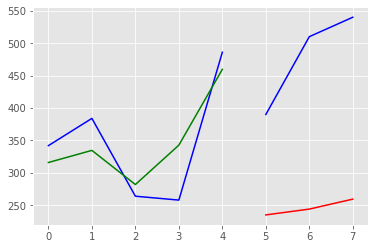

In [236]:
predictions11 = model11.predict(x_test11)                
predictions_train11 = model11.predict(x_train11)         

print(x_train11.shape)                               
print(y_train11.shape)
print(x_test11.shape)
print(y_test11.shape)
print(NN_MN_sku77.shape)

x2_11 = numpy.arange(0, 5, 1)                         
x3_11 = numpy.arange(5, 8, 1)

plt.plot(x2_11, y_train11, color='blue')                
plt.plot(x2_11, predictions_train11, color='green')     
plt.plot(x3_11, y_test11, color='blue')                 
plt.plot(x3_11, predictions11, color='red')             

# redline - прогноз, greenline - подгонка

In [237]:
print(predictions11)

[[235.14116]
 [244.12357]
 [259.48404]]


In [359]:
# -SKU#79-

In [244]:
MN_sku79 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #79')]
MN_sku79.drop('sku_id', axis=1, inplace=True)
#MN_sku79.iloc[:,1].plot() 

NN_MN_sku79 = pd.DataFrame()                                

for i in range(7,0,-1):                                    
    NN_MN_sku79['t-' + str(i)] = MN_sku79.iloc[:,1].shift(i)
    
NN_MN_sku79['t'] = MN_sku79.iloc[:,1].values                
#print(NN_MN_sku79.head(8))                                 

new_NN_MN_sku79 = NN_MN_sku79[7:]                           
#new_NN_MN_sku79.head()                                     

y12 = new_NN_MN_sku79['t']                                    
x12 = new_NN_MN_sku79.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train12 = x12[:2]                                            
y_train12 = y12[:2]                                            
x_test12 = x12[2:]                                              
y_test12 = y12[2:]

#print(new_NN_MN_sku79.shape)                               
#print(x_train12.shape)
#print(y_train12.shape)
#print(x_test12.shape)
#print(y_test12.shape)
#print(x_train12.head(5))                                     

x_train12 = x_train12.values                                    
y_train12 = y_train12.values
x_test12 = x_test12.values
y_test12 = y_test12.values

# NN

model12 = Sequential()
model12.add(Dense(6, input_dim=7, activation='relu'))       
model12.add(Dense(1, activation='linear'))                   
model12.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model12.fit(x_train12, y_train12, epochs=300, batch_size=None)

Epoch 1/300
2/2 [==============================] - 6s 3s/step - loss: 164006.5312 - mean_absolute_percentage_error: 40.2852
Epoch 2/300
2/2 [==============================] - 0s 2ms/step - loss: 155486.6250 - mean_absolute_percentage_error: 39.6893
Epoch 3/300
2/2 [==============================] - 0s 2ms/step - loss: 147957.8438 - mean_absolute_percentage_error: 39.0945
Epoch 4/300
2/2 [==============================] - 0s 2ms/step - loss: 141406.4062 - mean_absolute_percentage_error: 38.4992
Epoch 5/300
2/2 [==============================] - 0s 2ms/step - loss: 135769.6562 - mean_absolute_percentage_error: 37.9006
Epoch 6/300
2/2 [==============================] - 0s 3ms/step - loss: 130961.3828 - mean_absolute_percentage_error: 37.3012
Epoch 7/300
2/2 [==============================] - 0s 3ms/step - loss: 126908.3203 - mean_absolute_percentage_error: 36.7070
Epoch 8/300
2/2 [==============================] - 0s 2ms/step - loss: 123538.6719 - mean_absolute_percentage_error: 36.1235
E

Epoch 67/300
2/2 [==============================] - 0s 3ms/step - loss: 40796.9414 - mean_absolute_percentage_error: 20.1185
Epoch 68/300
2/2 [==============================] - 0s 3ms/step - loss: 39839.7695 - mean_absolute_percentage_error: 19.8945
Epoch 69/300
2/2 [==============================] - 0s 2ms/step - loss: 38898.8750 - mean_absolute_percentage_error: 19.6720
Epoch 70/300
2/2 [==============================] - 0s 2ms/step - loss: 37974.1094 - mean_absolute_percentage_error: 19.4506
Epoch 71/300
2/2 [==============================] - 0s 3ms/step - loss: 37065.3906 - mean_absolute_percentage_error: 19.2298
Epoch 72/300
2/2 [==============================] - 0s 3ms/step - loss: 36172.5234 - mean_absolute_percentage_error: 19.0092
Epoch 73/300
2/2 [==============================] - 0s 2ms/step - loss: 35295.2930 - mean_absolute_percentage_error: 18.7886
Epoch 74/300
2/2 [==============================] - 0s 2ms/step - loss: 34433.5859 - mean_absolute_percentage_error: 18.5677


Epoch 133/300
2/2 [==============================] - 0s 4ms/step - loss: 5674.4785 - mean_absolute_percentage_error: 7.5359
Epoch 134/300
2/2 [==============================] - 0s 3ms/step - loss: 5469.0596 - mean_absolute_percentage_error: 7.3989
Epoch 135/300
2/2 [==============================] - 0s 4ms/step - loss: 5269.8672 - mean_absolute_percentage_error: 7.2635
Epoch 136/300
2/2 [==============================] - 0s 2ms/step - loss: 5076.8052 - mean_absolute_percentage_error: 7.1299
Epoch 137/300
2/2 [==============================] - 0s 3ms/step - loss: 4889.7056 - mean_absolute_percentage_error: 6.9978
Epoch 138/300
2/2 [==============================] - 0s 2ms/step - loss: 4708.4346 - mean_absolute_percentage_error: 6.8673
Epoch 139/300
2/2 [==============================] - 0s 4ms/step - loss: 4532.8232 - mean_absolute_percentage_error: 6.7384
Epoch 140/300
2/2 [==============================] - 0s 2ms/step - loss: 4362.8262 - mean_absolute_percentage_error: 6.6112
Epoch 14

Epoch 200/300
2/2 [==============================] - 0s 4ms/step - loss: 285.0936 - mean_absolute_percentage_error: 1.6906
Epoch 201/300
2/2 [==============================] - 0s 2ms/step - loss: 270.4105 - mean_absolute_percentage_error: 1.6465
Epoch 202/300
2/2 [==============================] - 0s 4ms/step - loss: 256.4033 - mean_absolute_percentage_error: 1.6033
Epoch 203/300
2/2 [==============================] - 0s 2ms/step - loss: 243.0709 - mean_absolute_percentage_error: 1.5610
Epoch 204/300
2/2 [==============================] - 0s 2ms/step - loss: 230.3696 - mean_absolute_percentage_error: 1.5197
Epoch 205/300
2/2 [==============================] - 0s 2ms/step - loss: 218.2814 - mean_absolute_percentage_error: 1.4793
Epoch 206/300
2/2 [==============================] - 0s 2ms/step - loss: 206.7800 - mean_absolute_percentage_error: 1.4398
Epoch 207/300
2/2 [==============================] - 0s 2ms/step - loss: 195.8222 - mean_absolute_percentage_error: 1.4011
Epoch 208/300
2/

2/2 [==============================] - 0s 3ms/step - loss: 4.6437 - mean_absolute_percentage_error: 0.2158
Epoch 268/300
2/2 [==============================] - 0s 3ms/step - loss: 4.3273 - mean_absolute_percentage_error: 0.2083
Epoch 269/300
2/2 [==============================] - 0s 2ms/step - loss: 4.0303 - mean_absolute_percentage_error: 0.2010
Epoch 270/300
2/2 [==============================] - 0s 3ms/step - loss: 3.7533 - mean_absolute_percentage_error: 0.1940
Epoch 271/300
2/2 [==============================] - 0s 3ms/step - loss: 3.4931 - mean_absolute_percentage_error: 0.1872
Epoch 272/300
2/2 [==============================] - 0s 3ms/step - loss: 3.2513 - mean_absolute_percentage_error: 0.1806
Epoch 273/300
2/2 [==============================] - 0s 2ms/step - loss: 3.0244 - mean_absolute_percentage_error: 0.1742
Epoch 274/300
2/2 [==============================] - 0s 3ms/step - loss: 2.8134 - mean_absolute_percentage_error: 0.1680
Epoch 275/300
2/2 [===========================

In [245]:
scores12 = model12.evaluate(x_test12, y_test12)
y_pred12 = model12.predict(x_test12)          

def smape(y_test12, y_pred12):
    return 100/len(y_test12) * np.sum(2 * np.abs(y_pred12 - y_test12) / (np.abs(y_test12) + np.abs(y_pred12)))

print(smape(y_test12, y_pred12))

3/3 [==============================] - 2s 699ms/step
290.4874105703029


(2, 7)
(2,)
(3, 7)
(3,)
(12, 8)


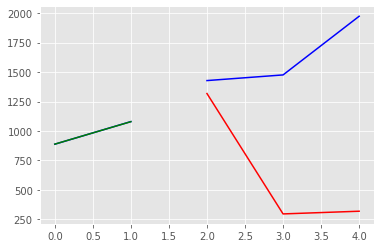

In [246]:
predictions12 = model12.predict(x_test12)                
predictions_train12 = model12.predict(x_train12)         

print(x_train12.shape)                               
print(y_train12.shape)
print(x_test12.shape)
print(y_test12.shape)
print(NN_MN_sku79.shape)

x2_12 = numpy.arange(0, 2, 1)                         
x3_12 = numpy.arange(2, 5, 1)

plt.plot(x2_12, y_train12, color='blue')                
plt.plot(x2_12, predictions_train12, color='green')     
plt.plot(x3_12, y_test12, color='blue')                 
plt.plot(x3_12, predictions12, color='red')             

# redline - прогноз, greenline - подгонка

In [247]:
print(predictions12)

[[1317.9376 ]
 [ 296.3342 ]
 [ 319.23553]]


In [367]:
# -SKU#81-

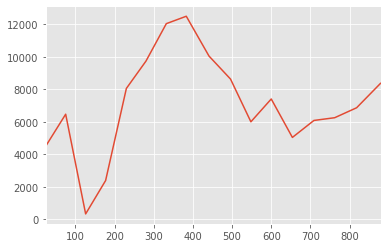

In [368]:
MN_sku81 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #81')]
MN_sku81.drop('sku_id', axis=1, inplace=True)
MN_sku81.iloc[:,1].plot()
# ВЫШЕЛ ИЗ ПРОДАЖ В 2019

In [369]:
# -SKU#82-

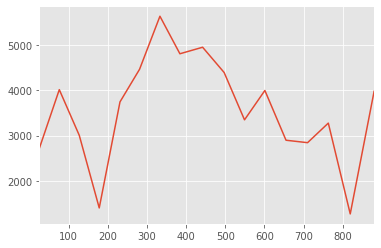

In [370]:
MN_sku82 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #82')]
MN_sku82.drop('sku_id', axis=1, inplace=True)
MN_sku82.iloc[:,1].plot()
# ВЫШЕЛ ИЗ ПРОДАЖ В 2019

In [371]:
# -SKU#83-

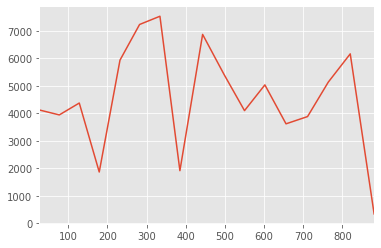

In [372]:
MN_sku83 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #83')]
MN_sku83.drop('sku_id', axis=1, inplace=True)
MN_sku83.iloc[:,1].plot()
# ВЫШЕЛ ИЗ ПРОДАЖ В 2019

In [ ]:
# -SKU#84-

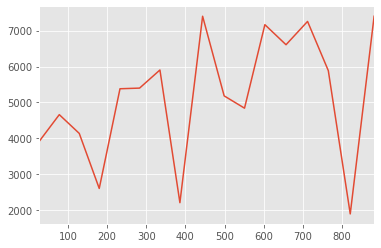

In [373]:
MN_sku84 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #84')]
MN_sku84.drop('sku_id', axis=1, inplace=True)
MN_sku84.iloc[:,1].plot()
# ВЫШЕЛ ИЗ ПРОДАЖ В 2019

In [374]:
# -SKU#97-

In [266]:
MN_sku97 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #97')]
MN_sku97.drop('sku_id', axis=1, inplace=True)
#MN_sku97.iloc[:,1].plot() 

NN_MN_sku97 = pd.DataFrame()                                

for i in range(7,0,-1):                                    
    NN_MN_sku97['t-' + str(i)] = MN_sku97.iloc[:,1].shift(i)
    
NN_MN_sku97['t'] = MN_sku97.iloc[:,1].values                
#print(NN_MN_sku97.head(8))                                 

new_NN_MN_sku97 = NN_MN_sku97[7:]                           
#new_NN_MN_sku97.head()                                     

y13 = new_NN_MN_sku97['t']                                    
x13 = new_NN_MN_sku97.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train13 = x13[:5]                                            
y_train13 = y13[:5]                                            
x_test13 = x13[5:]                                              
y_test13 = y13[5:]

#print(new_NN_MN_sku97.shape)                               
#print(x_train13.shape)
#print(y_train13.shape)
#print(x_test13.shape)
#print(y_test13.shape)
#print(x_train13.head(5))                                     

x_train13 = x_train13.values                                    
y_train13 = y_train13.values
x_test13 = x_test13.values
y_test13 = y_test13.values

# NN

model13 = Sequential()
model13.add(Dense(6, input_dim=7, activation='relu'))       
model13.add(Dense(1, activation='linear'))                   
model13.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model13.fit(x_train13, y_train13, epochs=300, batch_size=None)

Epoch 1/300
5/5 [==============================] - 6s 1s/step - loss: 57375.3516 - mean_absolute_percentage_error: 51.7045
Epoch 2/300
5/5 [==============================] - 0s 798us/step - loss: 56573.9688 - mean_absolute_percentage_error: 51.3051
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 55518.6953 - mean_absolute_percentage_error: 50.7694
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 54580.1875 - mean_absolute_percentage_error: 50.2863
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 53632.4180 - mean_absolute_percentage_error: 49.7935
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 52645.3359 - mean_absolute_percentage_error: 49.2731
Epoch 7/300
5/5 [==============================] - 0s 804us/step - loss: 51681.5625 - mean_absolute_percentage_error: 48.7564
Epoch 8/300
5/5 [==============================] - 0s 803us/step - loss: 50741.0625 - mean_absolute_percentage_error: 48.2437
Epo

Epoch 67/300
5/5 [==============================] - 0s 997us/step - loss: 29852.6309 - mean_absolute_percentage_error: 29.2733
Epoch 68/300
5/5 [==============================] - 0s 1ms/step - loss: 29688.4648 - mean_absolute_percentage_error: 29.1631
Epoch 69/300
5/5 [==============================] - 0s 1ms/step - loss: 29526.7402 - mean_absolute_percentage_error: 29.0652
Epoch 70/300
5/5 [==============================] - 0s 997us/step - loss: 29365.6758 - mean_absolute_percentage_error: 28.9670
Epoch 71/300
5/5 [==============================] - 0s 3ms/step - loss: 29206.3340 - mean_absolute_percentage_error: 28.8692
Epoch 72/300
5/5 [==============================] - 0s 2ms/step - loss: 29047.5898 - mean_absolute_percentage_error: 28.7710
Epoch 73/300
5/5 [==============================] - 0s 996us/step - loss: 28889.4258 - mean_absolute_percentage_error: 28.6723
Epoch 74/300
5/5 [==============================] - 0s 2ms/step - loss: 28730.7559 - mean_absolute_percentage_error: 28

Epoch 132/300
5/5 [==============================] - 0s 1ms/step - loss: 20440.2734 - mean_absolute_percentage_error: 23.0380
Epoch 133/300
5/5 [==============================] - 0s 1ms/step - loss: 20316.6328 - mean_absolute_percentage_error: 22.9704
Epoch 134/300
5/5 [==============================] - 0s 995us/step - loss: 20199.4160 - mean_absolute_percentage_error: 22.9237
Epoch 135/300
5/5 [==============================] - 0s 1ms/step - loss: 20082.5410 - mean_absolute_percentage_error: 22.8698
Epoch 136/300
5/5 [==============================] - 0s 598us/step - loss: 19964.9395 - mean_absolute_percentage_error: 22.8090
Epoch 137/300
5/5 [==============================] - 0s 1ms/step - loss: 19846.6367 - mean_absolute_percentage_error: 22.7416
Epoch 138/300
5/5 [==============================] - 0s 2ms/step - loss: 19728.0859 - mean_absolute_percentage_error: 22.6684
Epoch 139/300
5/5 [==============================] - 0s 997us/step - loss: 19608.5586 - mean_absolute_percentage_e

Epoch 197/300
5/5 [==============================] - 0s 1ms/step - loss: 13707.1768 - mean_absolute_percentage_error: 18.7349
Epoch 198/300
5/5 [==============================] - 0s 997us/step - loss: 13618.8779 - mean_absolute_percentage_error: 18.7144
Epoch 199/300
5/5 [==============================] - 0s 2ms/step - loss: 13532.2109 - mean_absolute_percentage_error: 18.6961
Epoch 200/300
5/5 [==============================] - 0s 998us/step - loss: 13448.0127 - mean_absolute_percentage_error: 18.6800
Epoch 201/300
5/5 [==============================] - 0s 4ms/step - loss: 13361.3438 - mean_absolute_percentage_error: 18.6577
Epoch 202/300
5/5 [==============================] - 0s 997us/step - loss: 13276.9873 - mean_absolute_percentage_error: 18.6379
Epoch 203/300
5/5 [==============================] - 0s 804us/step - loss: 13190.8262 - mean_absolute_percentage_error: 18.6190
Epoch 204/300
5/5 [==============================] - 0s 997us/step - loss: 13109.1514 - mean_absolute_percenta

Epoch 262/300
5/5 [==============================] - 0s 997us/step - loss: 8919.6211 - mean_absolute_percentage_error: 17.0141
Epoch 263/300
5/5 [==============================] - 0s 997us/step - loss: 8855.7871 - mean_absolute_percentage_error: 16.9813
Epoch 264/300
5/5 [==============================] - 0s 1ms/step - loss: 8800.1689 - mean_absolute_percentage_error: 16.9536
Epoch 265/300
5/5 [==============================] - 0s 996us/step - loss: 8739.2090 - mean_absolute_percentage_error: 16.9184
Epoch 266/300
5/5 [==============================] - 0s 1ms/step - loss: 8674.1143 - mean_absolute_percentage_error: 16.8765
Epoch 267/300
5/5 [==============================] - 0s 796us/step - loss: 8615.9385 - mean_absolute_percentage_error: 16.8401
Epoch 268/300
5/5 [==============================] - 0s 795us/step - loss: 8555.5840 - mean_absolute_percentage_error: 16.8051
Epoch 269/300
5/5 [==============================] - 0s 1ms/step - loss: 8495.6533 - mean_absolute_percentage_error

In [267]:
scores13 = model13.evaluate(x_test13, y_test13)
y_pred13 = model13.predict(x_test13)          

def smape(y_test13, y_pred13):
    return 100/len(y_test13) * np.sum(2 * np.abs(y_pred13 - y_test13) / (np.abs(y_test13) + np.abs(y_pred13)))

print(smape(y_test13, y_pred13))

3/3 [==============================] - 2s 721ms/step
99.464381247276


(5, 7)
(5,)
(3, 7)
(3,)
(15, 8)


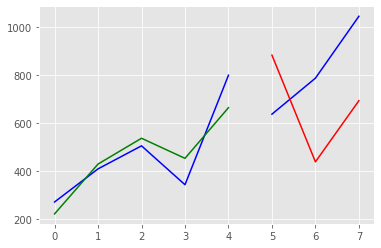

In [268]:
predictions13 = model13.predict(x_test13)                
predictions_train13 = model13.predict(x_train13)         

print(x_train13.shape)                               
print(y_train13.shape)
print(x_test13.shape)
print(y_test13.shape)
print(NN_MN_sku97.shape)

x2_13 = numpy.arange(0, 5, 1)                         
x3_13 = numpy.arange(5, 8, 1)

plt.plot(x2_13, y_train13, color='blue')                
plt.plot(x2_13, predictions_train13, color='green')     
plt.plot(x3_13, y_test13, color='blue')                 
plt.plot(x3_13, predictions13, color='red')             

# redline - прогноз, greenline - подгонка

In [269]:
print(predictions13)

[[881.90137]
 [437.26212]
 [692.14923]]


In [386]:
# -SKU#100-

In [315]:
MN_sku100 = df_for_MN.loc[(df_for_MN['sku_id'] == 'sku #100')]
MN_sku100.drop('sku_id', axis=1, inplace=True)
#MN_sku100.iloc[:,1].plot() 

NN_MN_sku100 = pd.DataFrame()                                

for i in range(7,0,-1):                                    
    NN_MN_sku100['t-' + str(i)] = MN_sku100.iloc[:,1].shift(i)
    
NN_MN_sku100['t'] = MN_sku100.iloc[:,1].values                
#print(NN_MN_sku100.head(8))                                 

new_NN_MN_sku100 = NN_MN_sku100[7:]                           
#new_NN_MN_sku100.head()                                     

y14 = new_NN_MN_sku100['t']                                    
x14 = new_NN_MN_sku100.drop('t', axis=1)                       

# ВЫБОРКА: На этoм моменте, определяем, на сколько месяцев будет предсказание
x_train14 = x14[:5]                                            
y_train14 = y14[:5]                                            
x_test14 = x14[5:]                                              
y_test14 = y14[5:]

#print(new_NN_MN_sku100.shape)                               
#print(x_train14.shape)
#print(y_train14.shape)
#print(x_test14.shape)
#print(y_test14.shape)
#print(x_train14.head(5))                                     

x_train14 = x_train14.values                                    
y_train14 = y_train14.values
x_test14 = x_test14.values
y_test14 = y_test14.values

# NN

model14 = Sequential()
model14.add(Dense(6, input_dim=7, activation='relu'))       
model14.add(Dense(1, activation='linear'))                   
model14.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mape']) 
model14.fit(x_train14, y_train14, epochs=300, batch_size=None)

Epoch 1/300
5/5 [==============================] - 7s 1s/step - loss: 4420.6802 - mean_absolute_percentage_error: 23.7202
Epoch 2/300
5/5 [==============================] - 0s 998us/step - loss: 4381.2573 - mean_absolute_percentage_error: 23.8979
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 4344.5806 - mean_absolute_percentage_error: 24.0751
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 4310.6040 - mean_absolute_percentage_error: 24.2452
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 4279.0801 - mean_absolute_percentage_error: 24.3998
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 4249.6201 - mean_absolute_percentage_error: 24.5351
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 4221.9399 - mean_absolute_percentage_error: 24.6538
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 4195.8730 - mean_absolute_percentage_error: 24.7593
Epoch 9/300
5/5

Epoch 67/300
5/5 [==============================] - 0s 2ms/step - loss: 3312.5815 - mean_absolute_percentage_error: 22.5388
Epoch 68/300
5/5 [==============================] - 0s 6ms/step - loss: 3300.1086 - mean_absolute_percentage_error: 22.4875
Epoch 69/300
5/5 [==============================] - 0s 2ms/step - loss: 3287.6421 - mean_absolute_percentage_error: 22.4354
Epoch 70/300
5/5 [==============================] - 0s 1ms/step - loss: 3275.1870 - mean_absolute_percentage_error: 22.3826
Epoch 71/300
5/5 [==============================] - 0s 2ms/step - loss: 3262.7407 - mean_absolute_percentage_error: 22.3293
Epoch 72/300
5/5 [==============================] - 0s 997us/step - loss: 3250.3049 - mean_absolute_percentage_error: 22.2757
Epoch 73/300
5/5 [==============================] - 0s 1ms/step - loss: 3237.8792 - mean_absolute_percentage_error: 22.2217
Epoch 74/300
5/5 [==============================] - 0s 1ms/step - loss: 3225.4617 - mean_absolute_percentage_error: 22.1674
Epoch 

Epoch 133/300
5/5 [==============================] - 0s 1ms/step - loss: 2519.4136 - mean_absolute_percentage_error: 18.9384
Epoch 134/300
5/5 [==============================] - 0s 2ms/step - loss: 2508.0327 - mean_absolute_percentage_error: 18.8811
Epoch 135/300
5/5 [==============================] - 0s 997us/step - loss: 2496.6738 - mean_absolute_percentage_error: 18.8238
Epoch 136/300
5/5 [==============================] - 0s 2ms/step - loss: 2485.3374 - mean_absolute_percentage_error: 18.7664
Epoch 137/300
5/5 [==============================] - 0s 2ms/step - loss: 2474.0256 - mean_absolute_percentage_error: 18.7089
Epoch 138/300
5/5 [==============================] - 0s 2ms/step - loss: 2462.7366 - mean_absolute_percentage_error: 18.6513
Epoch 139/300
5/5 [==============================] - 0s 1ms/step - loss: 2451.4744 - mean_absolute_percentage_error: 18.5936
Epoch 140/300
5/5 [==============================] - 0s 3ms/step - loss: 2440.2361 - mean_absolute_percentage_error: 18.535

Epoch 199/300
5/5 [==============================] - 0s 2ms/step - loss: 1827.0671 - mean_absolute_percentage_error: 15.7633
Epoch 200/300
5/5 [==============================] - 0s 1ms/step - loss: 1817.6191 - mean_absolute_percentage_error: 15.7338
Epoch 201/300
5/5 [==============================] - 0s 2ms/step - loss: 1808.2045 - mean_absolute_percentage_error: 15.7042
Epoch 202/300
5/5 [==============================] - 0s 1ms/step - loss: 1798.8250 - mean_absolute_percentage_error: 15.6746
Epoch 203/300
5/5 [==============================] - 0s 2ms/step - loss: 1789.4811 - mean_absolute_percentage_error: 15.6448
Epoch 204/300
5/5 [==============================] - 0s 2ms/step - loss: 1780.1715 - mean_absolute_percentage_error: 15.6150
Epoch 205/300
5/5 [==============================] - 0s 2ms/step - loss: 1770.8961 - mean_absolute_percentage_error: 15.5851
Epoch 206/300
5/5 [==============================] - 0s 2ms/step - loss: 1761.6555 - mean_absolute_percentage_error: 15.5551


Epoch 265/300
5/5 [==============================] - 0s 2ms/step - loss: 1281.9031 - mean_absolute_percentage_error: 13.6818
Epoch 266/300
5/5 [==============================] - 0s 2ms/step - loss: 1274.9198 - mean_absolute_percentage_error: 13.6489
Epoch 267/300
5/5 [==============================] - 0s 1ms/step - loss: 1267.9763 - mean_absolute_percentage_error: 13.6160
Epoch 268/300
5/5 [==============================] - 0s 2ms/step - loss: 1261.0699 - mean_absolute_percentage_error: 13.5830
Epoch 269/300
5/5 [==============================] - 0s 2ms/step - loss: 1254.2043 - mean_absolute_percentage_error: 13.5501
Epoch 270/300
5/5 [==============================] - 0s 2ms/step - loss: 1247.3745 - mean_absolute_percentage_error: 13.5171
Epoch 271/300
5/5 [==============================] - 0s 1ms/step - loss: 1240.5872 - mean_absolute_percentage_error: 13.4841
Epoch 272/300
5/5 [==============================] - 0s 1ms/step - loss: 1233.8356 - mean_absolute_percentage_error: 13.4511


In [316]:
scores14 = model14.evaluate(x_test14, y_test14)
y_pred14 = model14.predict(x_test14)          

def smape(y_test14, y_pred14):
    return 100/len(y_test14) * np.sum(2 * np.abs(y_pred14 - y_test14) / (np.abs(y_test14) + np.abs(y_pred14)))

print(smape(y_test14, y_pred14))

3/3 [==============================] - 3s 908ms/step
110.54250596258518


(5, 7)
(5,)
(3, 7)
(3,)
(15, 8)


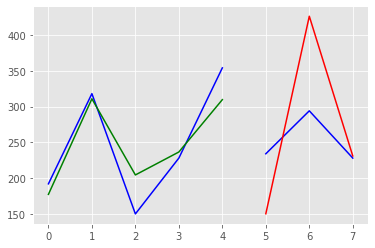

In [317]:
predictions14 = model14.predict(x_test14)                
predictions_train14 = model14.predict(x_train14)         

print(x_train14.shape)                               
print(y_train14.shape)
print(x_test14.shape)
print(y_test14.shape)
print(NN_MN_sku100.shape)

x2_14 = numpy.arange(0, 5, 1)                         
x3_14 = numpy.arange(5, 8, 1)

plt.plot(x2_14, y_train14, color='blue')                
plt.plot(x2_14, predictions_train14, color='green')     
plt.plot(x3_14, y_test14, color='blue')                 
plt.plot(x3_14, predictions14, color='red')             

# redline - прогноз, greenline - подгонка

In [318]:
print(predictions14)

[[150.20215]
 [426.13382]
 [230.91454]]
